In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import h5py

import windIO
import wind
import windWT as wt
import windCAD
import windOF as foam
import windCodes

import winsound

from matplotlib.ticker import FuncFormatter

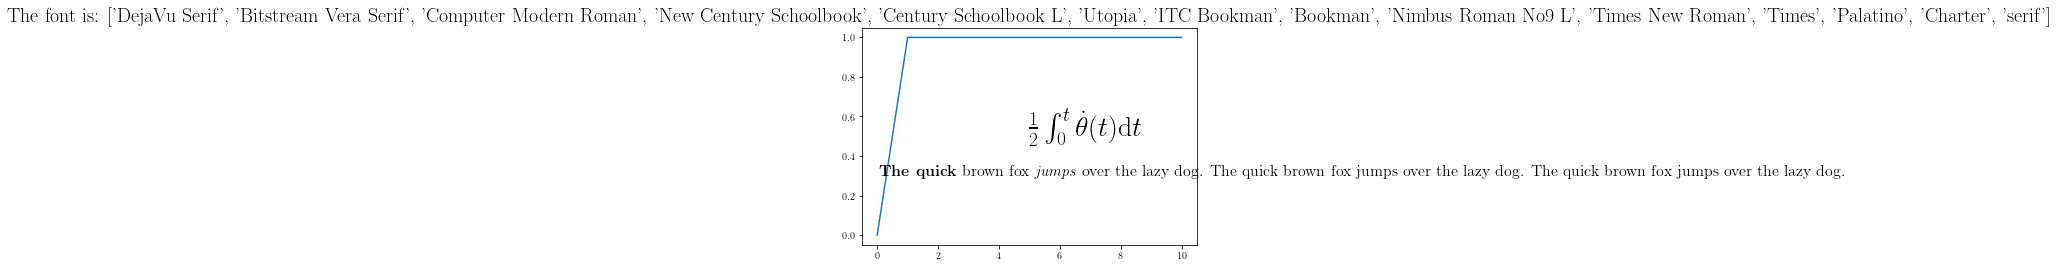

In [3]:
# # turn on latex rendering for matplotlib with Times New Roman font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# # change the font to Garamond
# plt.rc('text', usetex=False)
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Garamond'
# plt.rcParams['font.sans-serif'] = 'Garamond'

# # change the font to Times New Roman
# plt.rc('text', usetex=False)
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.serif'] = 'Times New Roman'
# plt.rcParams['font.sans-serif'] = 'Times New Roman'

# test the font
plt.figure()
plt.plot([0,1,10],[0,1,1])
txt = "The font is: " + str(plt.rcParams['font.serif'])
plt.title(txt,fontsize=20)
complexEquation = r"$\frac{1}{2} \int_0^t \dot{\theta}(t) \mathrm{d}t$"
plt.text(5,0.5,complexEquation,fontsize=28)
multilineTxt = r"\textbf{The quick} brown fox \textit{jumps} over the lazy dog. The quick brown fox jumps over the lazy dog. The quick brown fox jumps over the lazy dog."
plt.text(0.05,0.3,multilineTxt,fontsize=16)
plt.show()


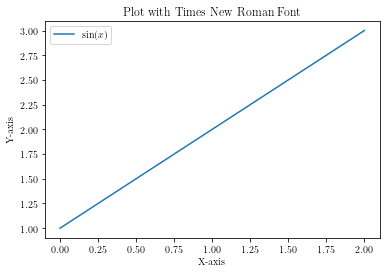

In [4]:
import matplotlib.pyplot as plt

# Set the font for regular text directly
plt.rcParams['font.family'] = 'Times New Roman'

# Example plot with Times New Roman font for regular text
plt.plot([1, 2, 3], label=r'$\sin(x)$')
plt.title('Plot with Times New Roman Font')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()


## Basic definitions

In [5]:
les_dir = r"D:/tempData_depot/simData_CandC/wt_tngE2_final/main.infl.t5.r2.s2/"

dir_wtVl_tngE2 = r"D:/tempData_depot/simData_CandC/wt_tngE2/"
dir_wtVl_tngE3 = r"D:/tempData_depot/simData_CandC/wt_tngE3/"

runIDs = ['p1', 'p2', 'p3', 'p4', 'p5',]

dir_wtCp_tngE2 = [r"E:/TNG/rawHFPI/tngE2"+x+"/" for x in runIDs]
dir_wtCp_tngE3 = [r"E:/TNG/rawHFPI/tngE3"+x+"/" for x in runIDs]

saveFigs = True
figDir = les_dir+ r"__plots/"
if not os.path.exists(figDir):
    os.makedirs(figDir)

In [6]:
caseDict = {
    # 'AoAs':     [0.0, 10.0, 20.0, 30.0, 40.0, 45.0, 50.0, 60.0, 70.0, 80.0, 90.0],
    'AoAs':     [0.0, 10.0, 20.0, 30.0, 45.0, 60.0, 70.0, 80.0, 90.0],
    'profile':  {'dir':les_dir+'tngE2.ed.t5.r2.s2', 'probeName':'prof_x0_y0'},
    'p0_Z':     1.0, # [m] probe height
    0.0:        {'dir':les_dir+'tngE2.00d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    10.0:       {'dir':les_dir+'tngE2.10d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    20.0:       {'dir':les_dir+'tngE2.20d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    30.0:       {'dir':les_dir+'tngE2.30d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    # 40.0:       {'dir':les_dir+'tngE2.40d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    45.0:       {'dir':les_dir+'tngE2.45d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    # 50.0:       {'dir':les_dir+'tngE2.50d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    60.0:       {'dir':les_dir+'tngE2.60d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    70.0:       {'dir':les_dir+'tngE2.70d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    80.0:       {'dir':les_dir+'tngE2.80d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
    90.0:       {'dir':les_dir+'tngE2.90d.m1.v1', 'probeName':'probes_WTtaps', 'p0_probeName':'prof_x0_y0'},
}


In [7]:
B = 0.2744
D = 0.183
lScl=1/50.0

Hr = 0.08  # ridge height
roofSlope = np.rad2deg(np.arctan(0.25/12))  # roof slope
He = Hr - D/2.0*np.sin(np.deg2rad(roofSlope))  # eaves height
Havg = np.mean([Hr, He])
H = Havg  # average roof height
print("Hr = {:.5g} m, He = {:.5g} m, Havg = {:.5g} m".format(Hr, He, Havg))

areaFactor_toFSm2 = (1/lScl**2)   # convert mm2 to m2 and normalize by the square of the length scale

fluidDensity = 1.225  # only for wind tunnel
fluidKinematicViscosity = 1.48e-5

badTaps = None
# badTaps = [1316, 1807, 2609,]
badTaps = [1807, 2609,]


Hr = 0.08 m, He = 0.078094 m, Havg = 0.079047 m


## Building Geometry

In [8]:
tapFile = r"D:/tempData_depot/simData_CandC/tngTapDefinition.csv"
tapInfo = pd.read_csv(tapFile)

faceID = [1,2,3,4,5,6]
name = ['Roof_1','Roof_2','Wall_1','Wall_2','Wall_3','Wall_4']
note = ['','','','','','']
origin = [[0,0,0.08],
          [0,-0.0915,0.07809375],
          [-0.1372,0,0],
          [0,-0.0915,0],
          [0.1372,0,0],
          [0,0.0915,0],]
basisVectors = [[[1,0,0],[0,0.999783057,0.020828814],[0,-0.020828814,0.999783057]],
                [[1,0,0],[0,0.999783057,-0.020828814],[0,0.020828814,0.999783057]],
                [[0,0,-1],[-1,0,0],[0,1,0]],
                [[1,0,0],[0,0,-1],[0,1,0]],
                [[0,0,1],[1,0,0],[0,1,0]],
                [[-1,0,0],[0,0,1],[0,1,0]],]

origin_plt = [[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              ]

basisVectors_plt = [[[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    ]
vertices = [[[-0.091519855,-0.1372],[0,-0.1372],[0,0.1372],[-0.091519855,0.1372],[-0.091519855,-0.1372]],
            [[0,-0.1372],[0.091519855,-0.1372],[0.091519855,0.1372],[0,0.1372],[0,-0.1372]],
            [[-0.0915,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0,-0.1532],[-0.0915,-0.15510625],[-0.0915,-0.2332]],
            [[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,-0.1372]],
            [[-0.0915,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0,0.1532],[-0.0915,0.15510625],[-0.0915,0.2332]],
            [[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,-0.1372]],]

lineDfn_ABCD = {
    'A': {'faceID':4, 'start': [0.18559377, 0.01306269], 'end': [0.1075, 0.01306269], },
    'B': {'faceID':2, 'start': [0.0915, 0.01306269], 'end': [0, 0.01306269], },
    'C': {'faceID':1, 'start': [0, 0.01306269], 'end': [-0.0915, 0.01306269], },
    'D': {'faceID':6, 'start': [-0.1075, 0.01306269], 'end': [-0.18559377, 0.01306269], },
    }
lineDfn_EFGH = {
    'E': {'faceID':5, 'start': [-0.0915, 0.18231127], 'end': [0.0915, 0.18231127], },
    'F': {'faceID':4, 'start': [0.13444109, 0.1372], 'end': [0.13444109, -0.1372], },
    'G': {'faceID':3, 'start': [0.0915, -0.18231127], 'end': [-0.0915, -0.18231127], },
    'H': {'faceID':6, 'start': [-0.13444109, -0.1372], 'end': [-0.13444109, 0.1372], },
    }
lineDfn_IJK = {
    'I': {'faceID':5, 'start': [0.09000327, 0.2332], 'end': [0.09000327, 0.15507505], },
    'J': {'faceID':2, 'start': [0.08950436, 0.1372], 'end': [0.08950436, -0.1372], },
    'K': {'faceID':3, 'start': [0.09000327, -0.15507505], 'end': [0.09000327, -0.2332], },
    }

lineDfn_L = {
    'L': {'faceID':2, 'start': [0.08351745, 0.1372], 'end': [0.08351745, -0.1372], },
    }
lineDfn_M = {
    'M': {'faceID':2, 'start': [0.07603382, 0.1372], 'end': [0.07603382, -0.1372], },
    }
lineDfn_N = {
    'N': {'faceID':2, 'start': [0.0915, 0.1372], 'end': [0.02963527, -0.1372], },
    }
lineDfn_OP = {
    'O': {'faceID':2, 'start': [0.0915, 0.1372], 'end': [0, 0.10655273], },
    'P': {'faceID':1, 'start': [0, 0.10655273], 'end': [-0.0915, 0.07590545], },
    }


In [9]:
# Zone Dict definitions

zoneDict_NBCC = [
        {    # Face 1
            0:['NBCC 2020', 'Zone c', np.array([[-0.091519855,-0.1372],[-0.071519855,-0.1372],[-0.071519855,-0.1172],[-0.091519855,-0.1172],[-0.091519855,-0.1372]])],
            1:['NBCC 2020', 'Zone c', np.array([[-0.091519855,0.1172],[-0.071519855,0.1172],[-0.071519855,0.1372],[-0.091519855,0.1372],[-0.091519855,0.1172]])],
            2:['NBCC 2020', 'Zone s', np.array([[-0.071519855,-0.1372],[0,-0.1372],[0,-0.1172],[-0.071519855,-0.1172],[-0.071519855,-0.1372]])],
            3:['NBCC 2020', 'Zone s', np.array([[-0.091519855,-0.1172],[-0.071519855,-0.1172],[-0.071519855,0.1172],[-0.091519855,0.1172],[-0.091519855,-0.1172]])],
            4:['NBCC 2020', 'Zone s', np.array([[-0.071519855,0.1172],[0,0.1172],[0,0.1372],[-0.071519855,0.1372],[-0.071519855,0.1172]])],
            5:['NBCC 2020', 'Zone r', np.array([[-0.071519855,-0.1172],[0,-0.1172],[0,0.1172],[-0.071519855,0.1172],[-0.071519855,-0.1172]])],
        },
        {   # Face 2
            0:['NBCC 2020', 'Zone c', np.array([[0.091519855,-0.1372],[0.071519855,-0.1372],[0.071519855,-0.1172],[0.091519855,-0.1172],[0.091519855,-0.1372]])],
            1:['NBCC 2020', 'Zone c', np.array([[0.091519855,0.1172],[0.071519855,0.1172],[0.071519855,0.1372],[0.091519855,0.1372],[0.091519855,0.1172]])],
            2:['NBCC 2020', 'Zone s', np.array([[0.071519855,-0.1372],[0,-0.1372],[0,-0.1172],[0.071519855,-0.1172],[0.071519855,-0.1372]])],
            3:['NBCC 2020', 'Zone s', np.array([[0.091519855,-0.1172],[0.071519855,-0.1172],[0.071519855,0.1172],[0.091519855,0.1172],[0.091519855,-0.1172]])],
            4:['NBCC 2020', 'Zone s', np.array([[0.071519855,0.1172],[0,0.1172],[0,0.1372],[0.071519855,0.1372],[0.071519855,0.1172]])],
            5:['NBCC 2020', 'Zone r', np.array([[0.071519855,-0.1172],[0,-0.1172],[0,0.1172],[0.071519855,0.1172],[0.071519855,-0.1172]])],
        },
        {   # Face 3
            0:['NBCC 2020', 'Zone e', np.array([[-0.0915,-0.2332],[-0.0715,-0.2332],[-0.0715,-0.154689583],[-0.0915,-0.15510625],[-0.0915,-0.2332]])],
            1:['NBCC 2020', 'Zone e', np.array([[0.0715,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0.0715,-0.154689583],[0.0715,-0.2332]])],
            2:['NBCC 2020', 'Zone w', np.array([[-0.0715,-0.2332],[0.0715,-0.2332],[0.0715,-0.154689583],[0,-0.1532],[-0.0715,-0.154689583],[-0.0715,-0.2332]])],
        },
        {   # Face 4
            0:['NBCC 2020', 'Zone e', np.array([[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,-0.1172],[0.107519855,-0.1172],[0.107519855,-0.1372]])],
            1:['NBCC 2020', 'Zone e', np.array([[0.107519855,0.1172],[0.185613605,0.1172],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,0.1172]])],
            2:['NBCC 2020', 'Zone w', np.array([[0.107519855,-0.1172],[0.185613605,-0.1172],[0.185613605,0.1172],[0.107519855,0.1172],[0.107519855,-0.1172]])],
        },
        {   # Face 5
            0:['NBCC 2020', 'Zone e', np.array([[-0.0915,0.2332],[-0.0715,0.2332],[-0.0715,0.154689583],[-0.0915,0.15510625],[-0.0915,0.2332]])],
            1:['NBCC 2020', 'Zone e', np.array([[0.0715,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0.0715,0.154689583],[0.0715,0.2332]])],
            2:['NBCC 2020', 'Zone w', np.array([[-0.0715,0.2332],[0.0715,0.2332],[0.0715,0.154689583],[0,0.1532],[-0.0715,0.154689583],[-0.0715,0.2332]])],
        },
        {   # Face 6
            0:['NBCC 2020', 'Zone e', np.array([[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,-0.1172],[-0.107519855,-0.1172],[-0.107519855,-0.1372]])],
            1:['NBCC 2020', 'Zone e', np.array([[-0.107519855,0.1172],[-0.185613605,0.1172],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,0.1172]])],
            2:['NBCC 2020', 'Zone w', np.array([[-0.107519855,-0.1172],[-0.185613605,-0.1172],[-0.185613605,0.1172],[-0.107519855,0.1172],[-0.107519855,-0.1172]])],
        },
]

zoneDict_ASCE = [
        {    # Face 1
            0:['ASCE 7-22', 'Zone 3', np.array([[-0.0435, 0.1372], [-0.0915, 0.1372], [-0.0915, 0.0892], [-0.0755, 0.0892], [-0.0755, 0.1212], [-0.0435, 0.1212], [-0.0435, 0.1372], ])],
            1:['ASCE 7-22', 'Zone 3', np.array([[-0.0915, -0.0892], [-0.0915, -0.1372], [-0.0435, -0.1372], [-0.0435, -0.1212], [-0.0755, -0.1212], [-0.0755, -0.0892], [-0.0915, -0.0892], ])],
            2:['ASCE 7-22', 'Zone 2', np.array([[0, 0.1372], [-0.0435, 0.1372], [-0.0435, 0.1212], [-0.0755, 0.1212], [-0.0755, 0.0892], [-0.0915, 0.0892], [-0.0915, -0.0892], 
                                                [-0.0755, -0.0892], [-0.0755, -0.1212], [-0.0435, -0.1212], [-0.0435, -0.1372], [0, -0.1372], [0, -0.0892], [-0.0435, -0.0892], 
                                                [-0.0435, 0.0892], [0, 0.0892], [0, 0.1372], ])],
            3:['ASCE 7-22', 'Zone 1', np.array([[0, 0.0892], [-0.0435, 0.0892], [-0.0435, -0.0892], [0, -0.0892], [0, 0.0892], ])],
        },
        {   # Face 2
            0:['ASCE 7-22', 'Zone 3', np.array([[0.0435, 0.1372], [0.0915, 0.1372], [0.0915, 0.0892], [0.0755, 0.0892], [0.0755, 0.1212], [0.0435, 0.1212], [0.0435, 0.1372], ])],
            1:['ASCE 7-22', 'Zone 3', np.array([[0.0915, -0.0892], [0.0915, -0.1372], [0.0435, -0.1372], [0.0435, -0.1212], [0.0755, -0.1212], [0.0755, -0.0892], [0.0915, -0.0892], ])],
            2:['ASCE 7-22', 'Zone 2', np.array([[0, 0.1372], [0.0435, 0.1372], [0.0435, 0.1212], [0.0755, 0.1212], [0.0755, 0.0892], [0.0915, 0.0892], [0.0915, -0.0892], 
                                                [0.0755, -0.0892], [0.0755, -0.1212], [0.0435, -0.1212], [0.0435, -0.1372], [0, -0.1372], [0, -0.0892], [0.0435, -0.0892], 
                                                [0.0435, 0.0892], [0, 0.0892], [0, 0.1372], ])],
            3:['ASCE 7-22', 'Zone 1', np.array([[0, 0.0892], [0.0435, 0.0892], [0.0435, -0.0892], [0, -0.0892], [0, 0.0892], ])],
        },
        {   # Face 3
            0:['ASCE 7-22', 'Zone 4', np.array([[-0.0715,-0.2332],[0.0715,-0.2332],[0.0715,-0.154689583],[0,-0.1532],[-0.0715,-0.154689583],[-0.0715,-0.2332]])],
            1:['ASCE 7-22', 'Zone 5', np.array([[-0.0915,-0.2332],[-0.0715,-0.2332],[-0.0715,-0.154689583],[-0.0915,-0.15510625],[-0.0915,-0.2332]])],
            2:['ASCE 7-22', 'Zone 5', np.array([[0.0715,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0.0715,-0.154689583],[0.0715,-0.2332]])],
        },
        {   # Face 4
            0:['ASCE 7-22', 'Zone 5', np.array([[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,-0.1172],[0.107519855,-0.1172],[0.107519855,-0.1372]])],
            1:['ASCE 7-22', 'Zone 5', np.array([[0.107519855,0.1172],[0.185613605,0.1172],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,0.1172]])],
            2:['ASCE 7-22', 'Zone 4', np.array([[0.107519855,-0.1172],[0.185613605,-0.1172],[0.185613605,0.1172],[0.107519855,0.1172],[0.107519855,-0.1172]])],
        },
        {   # Face 5
            0:['ASCE 7-22', 'Zone 5', np.array([[-0.0915,0.2332],[-0.0715,0.2332],[-0.0715,0.154689583],[-0.0915,0.15510625],[-0.0915,0.2332]])],
            1:['ASCE 7-22', 'Zone 5', np.array([[0.0715,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0.0715,0.154689583],[0.0715,0.2332]])],
            2:['ASCE 7-22', 'Zone 4', np.array([[-0.0715,0.2332],[0.0715,0.2332],[0.0715,0.154689583],[0,0.1532],[-0.0715,0.154689583],[-0.0715,0.2332]])],
        },
        {   # Face 6
            0:['ASCE 7-22', 'Zone 5', np.array([[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,-0.1172],[-0.107519855,-0.1172],[-0.107519855,-0.1372]])],
            1:['ASCE 7-22', 'Zone 5', np.array([[-0.107519855,0.1172],[-0.185613605,0.1172],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,0.1172]])],
            2:['ASCE 7-22', 'Zone 4', np.array([[-0.107519855,-0.1172],[-0.185613605,-0.1172],[-0.185613605,0.1172],[-0.107519855,0.1172],[-0.107519855,-0.1172]])],
        },
]

# file = caseDir+'NBCC_zoneDict.json'
# with open(file, 'w') as f:
#     json.dump(zoneDict,f, indent=4, separators=(',', ':'))

In [10]:
# nominalPanelAreas=[1.0e-4, 2.45e-4, 4.8e-4, 7.1e-4, 1e-3], #[5e-5, 8e-5, 1.5e-4, 5e-4]
# nominalPanelAreas=[4.4e-5, 8.15e-5, 1.3e-4, 5e-4, 6.8e-4, 1.3e-3,]  # Final! All are tested. 1.3e-3 results in blunt edge zones in the walls but no error.
nominalPanelAreas=[4.4e-5, 8.15e-5, 1.3e-4, 5.25e-4, 6.8e-4, 1.3e-3,]  # 5e-4 causes problems in ASCE 7-22 zone 2 
# nominalPanelAreas=[1.3e-3,]
# nominalPanelAreas=[4.8e-4, 7.2e-4, 1e-3]

faces_NBCC = []
for i,f in enumerate(faceID):
    idx = tapInfo.index[tapInfo.faceID == f]
    tapCoords = np.transpose(np.array([tapInfo.x[idx], tapInfo.y[idx]]))
    tapNos = np.array(tapInfo.tapNo[idx],dtype=int)
    idxOrig = idx

    fc = windCAD.face(
                name=name[i],
                ID=f,
                origin=origin[i],
                basisVectors=basisVectors[i],
                origin_plt=origin_plt[i],
                basisVectors_plt=basisVectors_plt[i],
                vertices=vertices[i],
                tapNo=tapNos,
                tapIdx=idxOrig,
                tapName=None,
                tapCoord=tapCoords,
                zoneDict=zoneDict_NBCC[i],
                nominalPanelAreas=nominalPanelAreas,
                numOfNominalPanelAreas=3,
                )
    # fc.plot(figSize=[20,15], overlayPanels=True, overlayTaps=True, overlayTribs=True, overlayZones=True)
    faces_NBCC.append(fc)

faces_ASCE = []
for i,f in enumerate(faceID):
    idx = tapInfo.index[tapInfo.faceID == f]
    tapCoords = np.transpose(np.array([tapInfo.x[idx], tapInfo.y[idx]]))
    tapNos = np.array(tapInfo.tapNo[idx],dtype=int)
    idxOrig = idx

    fc = windCAD.face(
                name=name[i],
                ID=f,
                origin=origin[i],
                basisVectors=basisVectors[i],
                origin_plt=origin_plt[i],
                basisVectors_plt=basisVectors_plt[i],
                vertices=vertices[i],
                tapNo=tapNos,
                tapIdx=idxOrig,
                tapName=None,
                tapCoord=tapCoords,
                zoneDict=zoneDict_ASCE[i],
                nominalPanelAreas=nominalPanelAreas,
                numOfNominalPanelAreas=3,
                )
    # fc.plot(figSize=[20,15], overlayPanels=True, overlayTaps=True, overlayTribs=True, overlayZones=True)
    faces_ASCE.append(fc)
# file = caseDir+'ttu_bldgGeom.json'
# allFaces.writeToFile(file_basic=file)

Generating panels ...


c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_polygons
  return lib.voronoi_polygons(geometry, tolerance, extend_to, only_edges, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_polygons
  return lib.voronoi_polygons(geometry, tolerance, extend_to, only_edges, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_polygons
  return lib.voronoi_polygons(geometry, tolerance, extend_to, only_edges, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_polygons
  return lib.voronoi_polygons(geometry, tolerance, extend_to, only_edges, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_pol

Done generating panels ...
Error summary in paneling:
{
    "NBCC 2020 -- Zone c": {
        "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05, 0.00013, 0.000525, 0.00068, 0.0013]": [],
        "tap idxs with weight errors": {
            "A=4.4e-05": [],
            "A=8.15e-05": [],
            "A=0.00013": [],
            "A=0.000525": [],
            "A=0.00068": [],
            "A=0.0013": []
        }
    },
    "NBCC 2020 -- Zone s": {
        "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05, 0.00013, 0.000525, 0.00068, 0.0013]": [],
        "tap idxs with weight errors": {
            "A=4.4e-05": [],
            "A=8.15e-05": [],
            "A=0.00013": [],
            "A=0.000525": [],
            "A=0.00068": [],
            "A=0.0013": []
        }
    },
    "NBCC 2020 -- Zone r": {
        "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05, 0.00013, 0.000525, 0.00068, 0.0013]": [],
        "tap idxs with weight errors": {
            "A=4.4e-05": [],
     

c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_polygons
  return lib.voronoi_polygons(geometry, tolerance, extend_to, only_edges, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_polygons
  return lib.voronoi_polygons(geometry, tolerance, extend_to, only_edges, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_polygons
  return lib.voronoi_polygons(geometry, tolerance, extend_to, only_edges, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_polygons
  return lib.voronoi_polygons(geometry, tolerance, extend_to, only_edges, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\shapely\constructive.py:963: RuntimeWarning: invalid value encountered in voronoi_pol

Done generating panels ...
Error summary in paneling:
{
    "NBCC 2020 -- Zone c": {
        "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05, 0.00013, 0.000525, 0.00068, 0.0013]": [],
        "tap idxs with weight errors": {
            "A=4.4e-05": [],
            "A=8.15e-05": [],
            "A=0.00013": [],
            "A=0.000525": [],
            "A=0.00068": [],
            "A=0.0013": []
        }
    },
    "NBCC 2020 -- Zone s": {
        "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05, 0.00013, 0.000525, 0.00068, 0.0013]": [],
        "tap idxs with weight errors": {
            "A=4.4e-05": [],
            "A=8.15e-05": [],
            "A=0.00013": [],
            "A=0.000525": [],
            "A=0.00068": [],
            "A=0.0013": []
        }
    },
    "NBCC 2020 -- Zone r": {
        "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05, 0.00013, 0.000525, 0.00068, 0.0013]": [],
        "tap idxs with weight errors": {
            "A=4.4e-05": [],
     

In [11]:
bldg = wind.bldgCp(bldgName='TTU_1to50_TNG',
                faces=faces_ASCE,
                H=H, He=He, Hr=Hr,
                D=D,B=B,roofSlope=roofSlope,lScl=lScl,
                caseName='GeomDefinition',
                AoA_zero_deg_basisVector=[1,0],
                AoA_rotation_direction='CCW',
                )
print(json.dumps(bldg.panelingErrors, indent=4, separators=(',', ':')))

Refreshing GeomDefinition...
Verifying data ...
Done refreshing GeomDefinition.

{
    "Face 1":{
        "ASCE 7-22 -- Zone 3":{
            "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05, 0.00013, 0.000525, 0.00068, 0.0013]":[],
            "tap idxs with weight errors":{
                "A=4.4e-05":[],
                "A=8.15e-05":[],
                "A=0.00013":[],
                "A=0.000525":[],
                "A=0.00068":[],
                "A=0.0013":[]
            }
        },
        "ASCE 7-22 -- Zone 2":{
            "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05, 0.00013, 0.000525, 0.00068, 0.0013]":[],
            "tap idxs with weight errors":{
                "A=4.4e-05":[],
                "A=8.15e-05":[],
                "A=0.00013":[],
                "A=0.000525":[],
                "A=0.00068":[],
                "A=0.0013":[]
            }
        },
        "ASCE 7-22 -- Zone 1":{
            "nom. areas idxs with tiling errors [4.4e-05, 8.15e-05

In [12]:
allLines = {}
lines = []
for lineName in lineDfn_ABCD.keys():
    faceID = lineDfn_ABCD[lineName]['faceID']
    fIdx = faceID-1
    line = windCAD.samplingLine(
        name=lineName,
        parentFace=bldg.faces[fIdx],
        start_xy=lineDfn_ABCD[lineName]['start'],
        end_xy=lineDfn_ABCD[lineName]['end'],
        fringeDistance=0.003,
        )
    lines.append(line)
linesABCD_WT = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='ABCD')
linesABCD_LES = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='ABCD')
allLines['ABCD'] = wind.SampleLinesCp(lines=lines, parentBldg=None, name='ABCD')
print(f"Taps of ABCD: {linesABCD_WT.tapNo()}")

lines = []
for lineName in lineDfn_EFGH.keys():
    faceID = lineDfn_EFGH[lineName]['faceID']
    fIdx = faceID-1
    line = windCAD.samplingLine(
        name=lineName,
        parentFace=bldg.faces[fIdx],
        start_xy=lineDfn_EFGH[lineName]['start'],
        end_xy=lineDfn_EFGH[lineName]['end'],
        fringeDistance=0.003,
        )
    lines.append(line)
linesEFGH_WT = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='EFGH')
linesEFGH_LES = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='EFGH')
allLines['EFGH'] = wind.SampleLinesCp(lines=lines, parentBldg=None, name='EFGH')
print(f"Taps of EFGH: {linesEFGH_WT.tapNo()}")

lines = []
for lineName in lineDfn_IJK.keys():
    faceID = lineDfn_IJK[lineName]['faceID']
    fIdx = faceID-1
    line = windCAD.samplingLine(
        name=lineName,
        parentFace=bldg.faces[fIdx],
        start_xy=lineDfn_IJK[lineName]['start'],
        end_xy=lineDfn_IJK[lineName]['end'],
        fringeDistance=0.003,
        )
    lines.append(line)
linesIJK_WT = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='IJK')
linesIJK_LES = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='IJK')
allLines['IJK'] = wind.SampleLinesCp(lines=lines, parentBldg=None, name='IJK')
print(f"Taps of IJK: {linesIJK_WT.tapNo()}")

lines = []
for lineName in lineDfn_L.keys():
    faceID = lineDfn_L[lineName]['faceID']
    fIdx = faceID-1
    line = windCAD.samplingLine(
        name=lineName,
        parentFace=bldg.faces[fIdx],
        start_xy=lineDfn_L[lineName]['start'],
        end_xy=lineDfn_L[lineName]['end'],
        fringeDistance=0.003,
        )
    lines.append(line)
linesL_WT = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='L')
linesL_LES = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='L')
allLines['L'] = wind.SampleLinesCp(lines=lines, parentBldg=None, name='L')
print(f"Taps of L: {linesL_WT.tapNo()}")

lines = []
for lineName in lineDfn_M.keys():
    faceID = lineDfn_M[lineName]['faceID']
    fIdx = faceID-1
    line = windCAD.samplingLine(
        name=lineName,
        parentFace=bldg.faces[fIdx],
        start_xy=lineDfn_M[lineName]['start'],
        end_xy=lineDfn_M[lineName]['end'],
        fringeDistance=0.003,
        )
    lines.append(line)
linesM_WT = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='M')
linesM_LES = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='M')
allLines['M'] = wind.SampleLinesCp(lines=lines, parentBldg=None, name='M')
print(f"Taps of M: {linesM_WT.tapNo()}")

lines = []
for lineName in lineDfn_N.keys():
    faceID = lineDfn_N[lineName]['faceID']
    fIdx = faceID-1
    line = windCAD.samplingLine(
        name=lineName,
        parentFace=bldg.faces[fIdx],
        start_xy=lineDfn_N[lineName]['start'],
        end_xy=lineDfn_N[lineName]['end'],
        fringeDistance=0.003,
        )
    lines.append(line)
linesN_WT = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='N')
linesN_LES = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='N')
allLines['N'] = wind.SampleLinesCp(lines=lines, parentBldg=None, name='N')
print(f"Taps of N: {linesN_WT.tapNo()}")

lines = []
for lineName in lineDfn_OP.keys():
    faceID = lineDfn_OP[lineName]['faceID']
    fIdx = faceID-1
    line = windCAD.samplingLine(
        name=lineName,
        parentFace=bldg.faces[fIdx],
        start_xy=lineDfn_OP[lineName]['start'],
        end_xy=lineDfn_OP[lineName]['end'],
        fringeDistance=0.003,
        )
    lines.append(line)
linesOP_WT = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='OP')
linesOP_LES = wind.SampleLinesCp(lines=lines, parentBldg=bldg, name='OP')
allLines['OP'] = wind.SampleLinesCp(lines=lines, parentBldg=None, name='OP')
print(f"Taps of OP: {linesOP_WT.tapNo()}")



Taps of ABCD: [1509, 907, 1508, 1507, 1506, 1505, 906, 1504, 1503, 1502, 905, 506, 1501, 1416, 1415, 505, 1414, 1413, 504, 1412, 1411, 1410, 503, 214, 213, 212, 211, 210, 1211, 1212, 1213]
Taps of EFGH: [1113, 1110, 1107, 1104, 1101, 1014, 1011, 1008, 1005, 1002, 915, 912, 909, 906, 1505, 903, 816, 813, 810, 807, 712, 711, 710, 709, 708, 707, 706, 705, 704, 1311, 1308, 1305, 1302, 1215, 1212, 1209, 1206, 1203, 1116]
Taps of IJK: [1004, 1005, 1006, 406, 1709, 1807, 1905, 410, 2013, 2111, 2209, 2301, 414, 2314, 2406, 2414, 2506, 502, 2603, 2611, 2703, 2711, 506, 1501, 2808, 2816, 2908, 510, 514, 602, 606, 610, 703, 712, 805]
Taps of L: [1611, 1708, 1806, 1904, 1915, 2012, 2110, 2208, 2216, 2306, 2313, 2405, 2413, 2505, 2511, 2602, 2610, 2702, 2710, 2716, 1416, 2807, 2815, 2907]
Taps of M: [405, 1707, 1805, 1903, 409, 2011, 2109, 2207, 2215, 413, 2312, 2404, 2412, 2504, 501, 2601, 2609, 2701, 2709, 505, 1415, 2806, 2814, 2906, 509, 513, 601, 605, 609]
Taps of N: [406, 1709, 1807, 1905, 19

### Plots

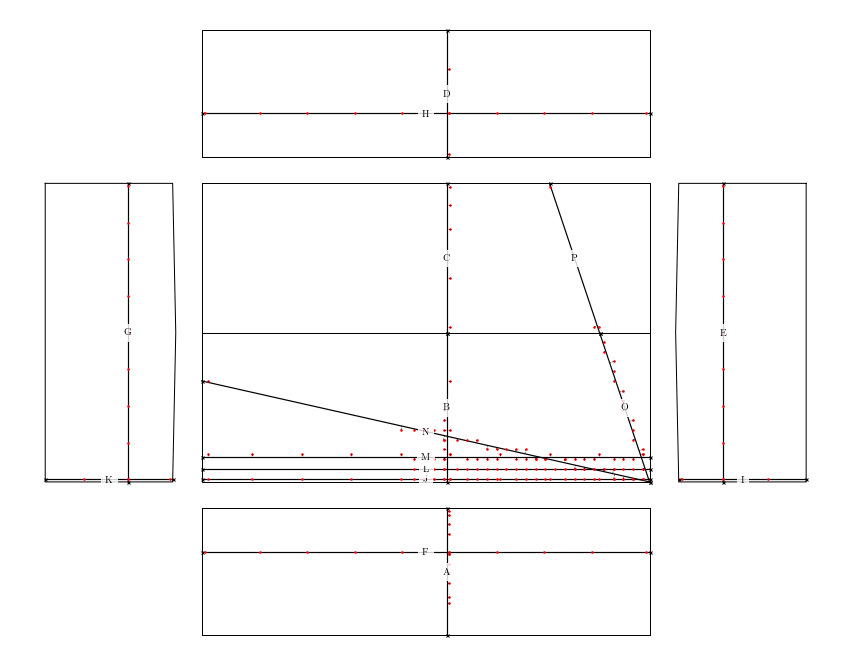

In [13]:
# fig = plt.figure(figsize=[10,8])
fig = plt.figure(figsize=[15,12])
ax = fig.add_subplot()

bldg.plotEdges(ax=ax,showName=False)
# bldg.plotZones(ax=ax)
# bldg.plotTaps(ax=ax)
# bldg.plotTribs(ax=ax)
# bldg.plotPanels(ax=ax,aIdx=2)

linesABCD_WT.plot(ax=ax)
linesEFGH_WT.plot(ax=ax)
linesIJK_WT.plot(ax=ax)
linesL_WT.plot(ax=ax)
linesM_WT.plot(ax=ax)
linesN_WT.plot(ax=ax)
linesOP_WT.plot(ax=ax)

ax.axis('equal')
ax.axis('off')
plt.show()

if saveFigs:
    # fig.savefig(figDir+"tapLayout.svg",format='svg',dpi=1200, bbox_inches='tight')
    fig.savefig(figDir+"tapLayout_withLines.svg",format='svg',dpi=1200, bbox_inches='tight')



In [14]:
print(bldg.tapIdx[50:60])
print(bldg.tapNo[50:60])

[204, 205, 206, 207, 208, 50, 51, 52, 53, 54]
[1313, 1314, 1315, 1316, 1401, 403, 404, 405, 406, 407]


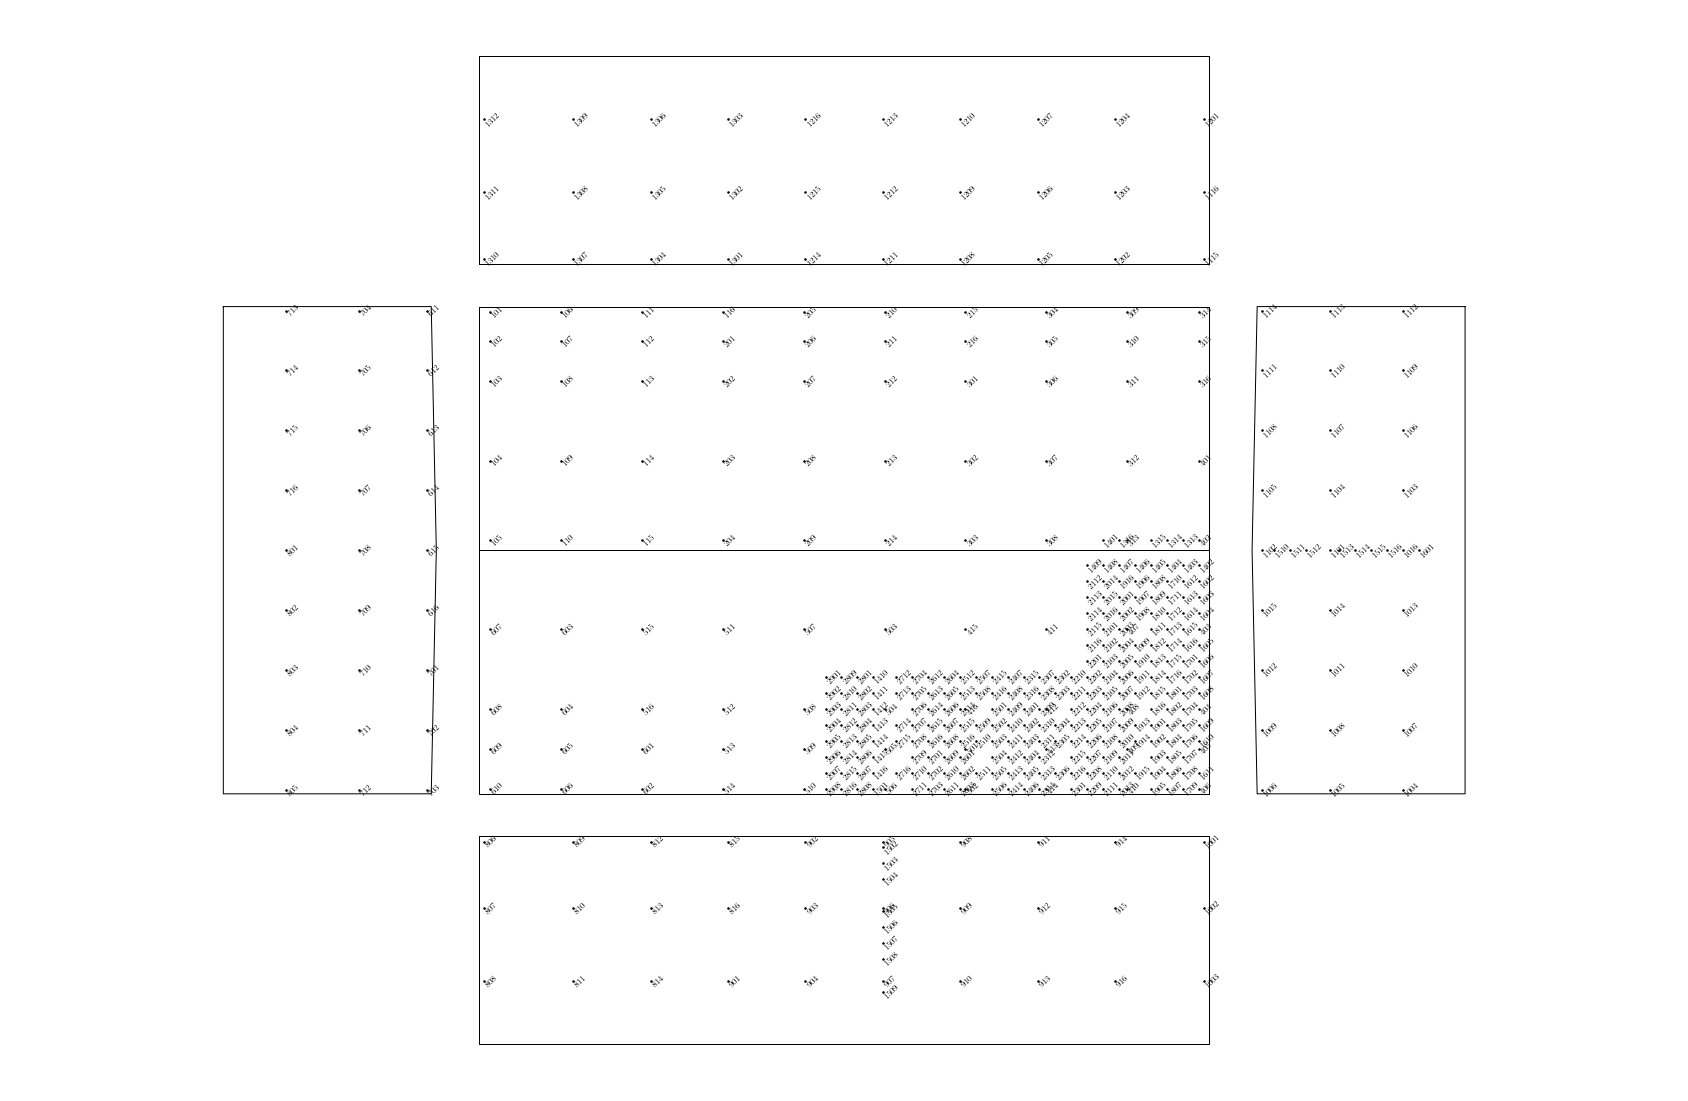

In [15]:
# tap layout
fig = plt.figure(figsize=[30,20])
ax = fig.add_subplot()

bldg.plotEdges(ax=ax,showName=False)
bldg.plotTaps(ax=ax, showTapNo=True, #tapsToPlot=bldg.tapNo[:203], 
              textOffset_tapNo=[0.0,0.00], 
              kwargs_text= { 'ha': 'left','va': 'center','color': 'k','backgroundcolor': [1, 1, 1, 0.5],'fontsize': 'small','rotation': 45,
                            'bbox': dict(boxstyle="round", fc=[1, 1, 1, 0.0], ec="None", pad=0.0),}
              )
# bldg.plotTribs(ax=ax)
# bldg.plotPanels(ax=ax,aIdx=2)

ax.axis('equal')
ax.axis('off')
if saveFigs:
    fig.savefig(figDir+"tapLayout_withTapNo.svg",format='svg',dpi=1200, bbox_inches='tight')


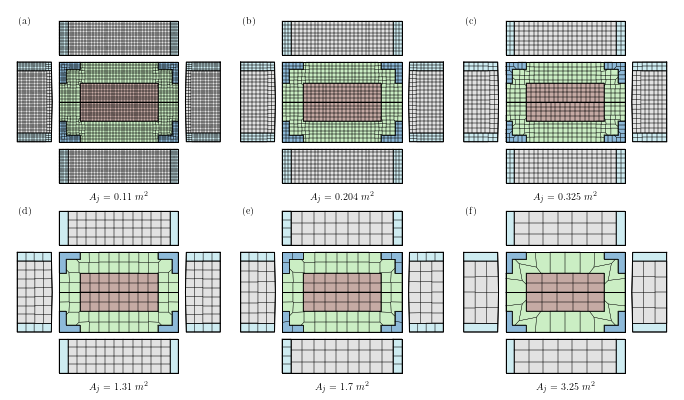

In [16]:
fig, axs = bldg.plotPanels_AllAreas(figsize=[12,7.0], nCols=3,
    areaUnit=r'$m^2$', areaFactor=areaFactor_toFSm2, areaFmt='{:2.3g}',)

if saveFigs:
    fig.savefig(figDir+"nominalPanelAreas_ASCE.svg",format='svg',dpi=300, bbox_inches='tight')

## Wind field

### LES wind field

In [17]:

lesVel_E2 = foam.readVelProfile(caseDir=caseDict['profile']['dir'], probeName=caseDict['profile']['probeName'],H=H, readFromNPY_file=True, writeToFile=True, 
                                kwargs_profile={'workSect_zLim':[0, 0.5],  'lScl':lScl, 'nSpectAvg':16})
lesVel_E2.name = "LES$(z_0=0.01m)$"
lesVel_E2.SpectH.name = lesVel_E2.name

lesVel_E2.kwargs_z0_fit_Iu = {'fitTo':'Iu', # 'Iu' or 'U'
                            'uStar_init':1.0, 
                            'z0_init':0.001, 
                            'kwargs_z0Fit':{'z0i':[1e-10,1.0]}}
_ = lesVel_E2.fit_z0(debugMode=False, )

# lesVel_E3 = foam.processVelProfile(caseDir=dir_lesE3_00, probeName='probes.V1',H=H, trimTimeSegs=[[0,1.0]])
# lesVel_E3.name = "LES(z_0=0.087m)"

Processing OpenFOAM case:	D:/tempData_depot/simData_CandC/wt_tngE2_final/main.infl.t5.r2.s2/tngE2.ed.t5.r2.s2
Probe read from:		D:/tempData_depot/simData_CandC/wt_tngE2_final/main.infl.t5.r2.s2/tngE2.ed.t5.r2.s2/postProcessing/prof_x0_y0
  >> Reading probe data ...
  >> Reading data from NPY file.
             << Done!
  >> Processing profile data.
  >> Reading pressure data ...
  >> Reading data from NPY file.
             << Done!
  >> Finished reading probe data.
Message from ESDU85: Functionality for zero-plane displacement is not implemented yet.
Message from ESDU85: Functionality for uncertainty bounds is not implemented yet.
Message from ESDU85: Functionality for zero-plane displacement is not implemented yet.
Message from ESDU85: Functionality for uncertainty bounds is not implemented yet.
Fitted z0 = 0.016m @FS


D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py:763: RuntimeWarning: invalid value encountered in log
  U_func = lambda Z, uStar, z0: uStar / VON_KARMAN_CONST * np.log((Z - d) / z0)


### Wind tunnel

Message from ESDU85: Functionality for zero-plane displacement is not implemented yet.
Message from ESDU85: Functionality for uncertainty bounds is not implemented yet.
Message from ESDU85: Functionality for zero-plane displacement is not implemented yet.
Message from ESDU85: Functionality for uncertainty bounds is not implemented yet.
No velocity time history found for ESDU-85 ($z_0=0.0083 m$). Skipping velocity statistics calculation.
No velocity time history found for ESDU-85 ($z_0=0.000928 m$). Skipping velocity statistics calculation.
Fitted z0 = 0.0081m @FS
0.00016113281448388675


D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py:3129: RuntimeWarning: invalid value encountered in power
  return np.divide(7.5*eta * np.power(0.538 + 0.09*np.log(Z/self.z0), p),


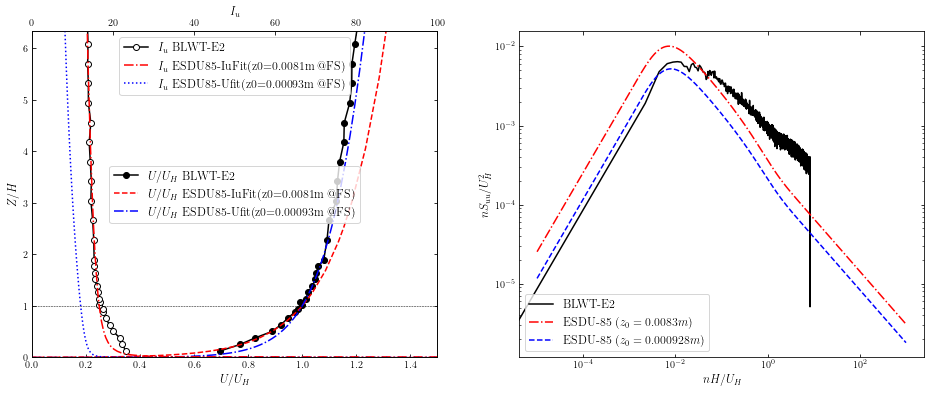

In [18]:
keepTH = True

temp = h5py.File(dir_wtVl_tngE2+"tngE2Fr1_forPython.mat", 'r')
wtVel_E2 = wind.profile(name="BLWT-E2", Z=temp['Z'][0][()],UofT=temp['UofT'][()],VofT=temp['VofT'][()],WofT=temp['WofT'][()],H=H,dt=temp['dt'][0][0],nSpectAvg=64, 
                        workSect_zLim=[0, 0.5], lScl=lScl,
                        keepTH=keepTH)
wtVel_E2.kwargs_z0_fit = {'fitTo':'Iu', # 'Iu' or 'U'
                        'uStar_init':1.0, 
                        'z0_init':0.001, 
                        'kwargs_z0Fit':{'z0i':[1e-10,1.0]}}
wtVel_E2.fit_z0(debugMode=True, )
print(wtVel_E2.z0_Iu)



# temp = h5py.File(dir_wtVl_tngE3+"tngE3Fr1_forPython.mat", 'r')
# wtVel_E3 = wind.profile(name="BLWT-E3", Z=temp['Z'][0][()],UofT=temp['UofT'][()],VofT=temp['VofT'][()],WofT=temp['WofT'][()],H=H,dt=temp['dt'][0][0],nSpectAvg=64, keepTH=keepTH)


In [19]:
vel = wind.Profiles([wtVel_E2, lesVel_E2,])

wtVel_E2_es74 = wtVel_E2.copy()
_ = wtVel_E2_es74.fit_z0(debugMode=False, ESDUversion='ESDU74')

# esdu74_E2 = wind.ESDU74(z0=wtVel_E2_es74.z0_Iu/wtVel_E2_es74.lScl, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
# esdu85_E2 = wind.ESDU85(z0=wtVel_E2.z0_Iu/wtVel_E2.lScl, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu74_E2 = wind.ESDU74(z0=0.01, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu85_E2 = wind.ESDU85(z0=0.01, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))


Message from ESDU74: Functionality for uncertainty bounds is not implemented yet.
Message from ESDU74: Functionality for uncertainty bounds is not implemented yet.
Fitted z0 = 0.0049m @FS
Message from ESDU74: Functionality for uncertainty bounds is not implemented yet.
Message from ESDU85: Functionality for zero-plane displacement is not implemented yet.
Message from ESDU85: Functionality for uncertainty bounds is not implemented yet.


D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py:763: RuntimeWarning: invalid value encountered in log
  U_func = lambda Z, uStar, z0: uStar / VON_KARMAN_CONST * np.log((Z - d) / z0)


## Surface pressure, $C_p$

In [20]:
peakSpecs = wind.DEFAULT_PEAK_SPECS
peakSpecs['Num_seg'] = 10
peakSpecs['Duration'] = 10
peakSpecs['prob_non_excd'] = 0.8

### Load CFD Cp

In [21]:
allPres = []
nmin = 1000000000000
tCutIdx = 14000
readFromNPY_file=True
AoA_final = []
p0_profs = []
for i, aoa in enumerate(caseDict['AoAs']):
    p,probes,time = foam.readSurfacePressure(caseDir=caseDict[aoa]['dir'], probeName=caseDict[aoa]['probeName'], readFromNPY_file=readFromNPY_file, writeToFile=True)
    p0,probes_0,time_0  = foam.readSurfacePressure(caseDir=caseDict[aoa]['dir'], probeName=caseDict[aoa]['p0_probeName'], readFromNPY_file=readFromNPY_file, writeToFile=True)

    if p.shape[1] >= tCutIdx:
        # get the indices of common time steps between p0 and p. Don't apply tCutIdx here
        idx_p0 = np.where(np.isin(np.round(time_0,5), np.round(time,5)))[0]
        idx_p = np.where(np.isin(np.round(time,5), np.round(time_0,5)))[0]
        print(f"Shape of p0: {p0.shape}")
        print(f"Shape of p: {p.shape}")

        p = p[:, idx_p]
        p0 = p0[:, idx_p0]

        allPres.append(p - p0[-10, :])
        AoA_final.append(aoa)
        print(p.shape)
        nmin = min(nmin, p.shape[1])
        # p0_profs.append(p0_prof)

print(f"Minimum number of time steps: {nmin}")
for i in range(len(allPres)):
    print(f"Shape of allPres[{i}]: {allPres[i].shape}")
    allPres[i] = allPres[i][:, :nmin]

allPressure = np.array(allPres)

print(allPressure.shape)

Processing OpenFOAM case:	D:/tempData_depot/simData_CandC/wt_tngE2_final/main.infl.t5.r2.s2/tngE2.00d.m1.v1
Probe read from:		D:/tempData_depot/simData_CandC/wt_tngE2_final/main.infl.t5.r2.s2/tngE2.00d.m1.v1/postProcessing/probes_WTtaps
  >> Reading probe data ...
  >> Reading data from NPY file.
      Shape of pressure data: (456, 39725)
      Shape of probes data: (456, 3)
      Shape of time data: (39725,)
             << Done!
             << Done!
  >> Finished reading probe data.
Processing OpenFOAM case:	D:/tempData_depot/simData_CandC/wt_tngE2_final/main.infl.t5.r2.s2/tngE2.00d.m1.v1
Probe read from:		D:/tempData_depot/simData_CandC/wt_tngE2_final/main.infl.t5.r2.s2/tngE2.00d.m1.v1/postProcessing/prof_x0_y0
  >> Reading probe data ...
  >> Reading data from NPY file.
      Shape of pressure data: (29, 39752)
      Shape of probes data: (29, 3)
      Shape of time data: (39752,)
             << Done!
             << Done!
  >> Finished reading probe data.
Shape of p0: (29, 39752

In [22]:
# casename = 'tngE2.00d.m1.v1'
# pres, pts, time_p, = foam.readSurfacePressure(caseDir=les_dir+casename, probeName='probes_WTtaps', )
# pres = np.expand_dims(pres.T, axis=0)
# print(pres.shape)
dt = np.diff(time).mean()
# add one dimension as a first dimension of pres


LES_Cp = wind.bldgCp(
                    bldgName=bldg.name,
                    # name=bldg.name + 'LES',
                    faces=bldg.faces,
                    H=H,D=D,B=B,roofSlope=roofSlope,lScl=lScl,
                    AoA_zero_deg_basisVector=bldg.AoA_zero_deg_basisVector,
                    AoA_rotation_direction=bldg.AoA_rotation_direction,
                    caseName='LES',
                    refProfile=lesVel_E2,
                    samplingFreq=1/dt,
                    Uref_input=lesVel_E2.Uh,
                    Uref_FS=25.0,
                    AoA=AoA_final, #caseDict['AoAs'],
                    CpOfT=None,
                    notes_Cp='---',
                    reReferenceCpToH=False,
                    pOfT=allPressure,
                    # p0ofT=p0_prof.pOfT[:nmin,-10],
                    CpStats=None,
                    peakSpecs=peakSpecs,
                    CpStats_fields=['mean','std','peak','skewness','kurtosis'],
                    keepTH=True,
                    )

_ = LES_Cp.RemoveBadTaps(badTaps=badTaps, )

Refreshing LES...
Verifying data ...
Computing Cp time history ...
Uref = [12.55060702 12.55060702 12.55060702 12.55060702 12.55060702 12.55060702
 12.55060702 12.55060702 12.55060702]
Shape of self.pOfT = (9, 456, 27822)
Shape of p0ofT = ()
Shape of pOfT = (9, 456, 27822)
Shape of self.fluidDensity = ()
Computing Cp statistics ...
Computing area-averaging ...
    Computing area-averaging for face Roof_1 ...
    Computing area-averaging for face Roof_2 ...
    Computing area-averaging for face Wall_1 ...
    Computing area-averaging for face Wall_2 ...
    Computing area-averaging for face Wall_3 ...
    Computing area-averaging for face Wall_4 ...
Done refreshing LES.

Already removed taps: []
Removing taps: [1807, 2609]
Face Roof_1: Removing bad tap 1807 with index in data 278 ...
Face Roof_1: Removing bad tap 2609 with index in data 408 ...
Face Roof_2: Removing bad tap 1807 with index in data 278 ...
  ... found it in face Roof_2
Face Roof_2: Removing bad tap 2609 with index in dat

In [23]:
# LES_Cp.faces=bldg.copy().faces
# print(LES_Cp.RemovedBadTaps)

# print(badTaps)
# removedTaps = LES_Cp.RemoveBadTaps(badTaps=badTaps, )

# print(LES_Cp.tapIdxOf(1807))

# # print the dictionary of removed taps
# print(json.dumps(LES_Cp.RemovedBadTaps, indent=4, separators=(',', ':')))
# print(LES_Cp.RemovedBadTaps)

# print(np.shape(LES_Cp.tapNo))
# print(LES_Cp.RemovedBadTaps)

In [24]:
kwargs_bldgDef = {
    'bldgName':bldg.name,
    'faces':bldg.faces,
    'H':H,'D':D,'B':B,'roofSlope':roofSlope,'lScl':lScl,
    'AoA_zero_deg_basisVector':bldg.AoA_zero_deg_basisVector,
    'AoA_rotation_direction':bldg.AoA_rotation_direction,
    'caseName':'LES',
    'refProfile':lesVel_E2,
    'samplingFreq':1/dt,
    'Uref_input':lesVel_E2.Uh,
    'Uref_FS':25.0,
    'AoA':AoA_final, #caseDict['AoAs'],
    'notes_Cp':'---',
    'reReferenceCpToH':False,
    'CpStats':None,
    'peakSpecs':peakSpecs,
    'CpStats_fields':['mean','std','peak','skewness','kurtosis'],
    'computeAreaAveragedCpStats':False,
    }

LES_Cp_cum = wind.BldgCp_cummulative(mainBldg=LES_Cp, N_steps=50, kwargs_bldgDef=kwargs_bldgDef)

***********************************************************************************************
Creating 50 sub-buildings with an increment of 556 time steps.
-----------------------------------------------------------------------------------------------
Refreshing LES...
Verifying data ...
Computing Cp statistics ...
Done refreshing LES.

    Created sub-building 1 of 50
        T = 0.28 s
-----------------------------------------------------------------------------------------------
Refreshing LES...
Verifying data ...
Computing Cp statistics ...


D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py:6372: UserWarning: Overwriting 'bldgName' in kwargs_bldgDef
  warnings.warn(f"Overwriting 'bldgName' in kwargs_bldgDef")


Done refreshing LES.

    Created sub-building 2 of 50
        T = 0.56 s
-----------------------------------------------------------------------------------------------
Refreshing LES...
Verifying data ...
Computing Cp statistics ...
Done refreshing LES.

    Created sub-building 3 of 50
        T = 0.83 s
-----------------------------------------------------------------------------------------------
Refreshing LES...
Verifying data ...
Computing Cp statistics ...
Done refreshing LES.

    Created sub-building 4 of 50
        T = 1.11 s
-----------------------------------------------------------------------------------------------
Refreshing LES...
Verifying data ...
Computing Cp statistics ...
Done refreshing LES.

    Created sub-building 5 of 50
        T = 1.39 s
-----------------------------------------------------------------------------------------------
Refreshing LES...
Verifying data ...
Computing Cp statistics ...
Done refreshing LES.

    Created sub-building 6 of 50
     

In [26]:
# _ = LES_Cp.plotCpTimeHistories(#tapsToPlot=[801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816], 
#                                AoA=70)


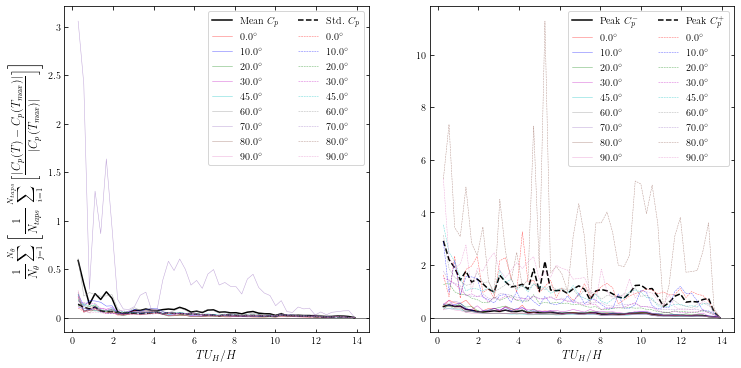

In [27]:
cols = ['r','b','g','m','c','gray','tab:purple','tab:brown','tab:pink','tab:olive','tab:cyan','tab:gray','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:gray','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:gray','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:gray','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:gray','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:gray','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:gray','tab:blue','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan',]
ls = ['-','--','-.',':']
fields = ['mean','std',]
fields2 = ['peakMin','peakMax',]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[12,6])

ax = axs[0]
for n, s in enumerate(fields):
    tapIdxs = LES_Cp.tapIdx
    # for i in range(456): #range(231,233):
    #     for j in range(0,3):
    #         ax.plot(LES_Cp_cum.T, stat[:,j,i], color='gray',alpha=0.5, )#label= LES_Cp.tapNo[tapIdxs[i]])

    stat = LES_Cp_cum.CpStats_NormTmax_AoATapAvg[s]
    ax.plot(LES_Cp_cum.T, stat, label=wind.fullName(s,True), lw=1.5,color='k',ls=ls[n])

    stat = LES_Cp_cum.CpStats_NormTmax_TapAvg[s]
    for j,aoa in enumerate(LES_Cp.AoA):
        ax.plot(LES_Cp_cum.T, stat[:,j], label=f'${aoa}^\circ$', lw=0.5, alpha=0.6,ls=ls[n], color=cols[j])
        
    
ax.axhline(y=0.0, color='k', linestyle='-',lw=0.5)
ax.set_xlabel(wind.mathName('T*'))
ax.set_ylabel(LES_Cp_cum.CpStats_NormTmax_AoATapAvg_eqn)
ax.legend(ncol=len(fields))
wind.formatAxis(ax, gridMajor=False)


ax = axs[1]
for n, s in enumerate(fields2):
    tapIdxs = LES_Cp.tapIdx
    # for i in range(456): #range(231,233):
    #     for j in range(0,3):
    #         ax.plot(LES_Cp_cum.T, stat[:,j,i], color='gray',alpha=0.5, )#label= LES_Cp.tapNo[tapIdxs[i]])

    stat = LES_Cp_cum.CpStats_NormTmax_AoATapAvg[s]
    ax.plot(LES_Cp_cum.T, stat, label=wind.fullName(s,True), lw=1.5,color='k',ls=ls[n])

    stat = LES_Cp_cum.CpStats_NormTmax_TapAvg[s]
    for j,aoa in enumerate(LES_Cp.AoA):
        ax.plot(LES_Cp_cum.T, stat[:,j], label=f'${aoa}^\circ$', lw=0.5, alpha=0.6,ls=ls[n], color=cols[j])
    
ax.axhline(y=0.0, color='k', linestyle='-',lw=0.5)
ax.set_xlabel(wind.mathName('T*'))
# ax.set_ylabel(LES_Cp_cum.CpStats_NormTmax_AoATapAvg_eqn)
ax.legend(ncol=len(fields2))
wind.formatAxis(ax, gridMajor=False)

plt.show()

if saveFigs:
    fig.savefig(figDir+"CpStats_NormTmax_AoATapAvg.svg",format='svg',dpi=1200, bbox_inches='tight')

### Wind tunnel data

In [28]:
analogChannels_idxs={
                'main_pitot': 0,
                'xref_pitot': 2,
            }
pressureExtraChannels_tapNos={
                'main_pitot_zero': 3009,
                'main_pitot_q': 3010,
                '20inch_pitot_zero': 3007,
                '20inch_pitot_q': 3008,
                'Uh_pitot_zero': 3005,
                'Uh_pitot_q': 3006,
            }

mainRefPitotChnlIdx = 2
Zpitot = 1.48
Ntaps = 456
lowpassFreq=200.0

In [29]:
# cps_OP = []
i, rID = 0, runIDs[0]
# for i, rID in enumerate(runIDs):
print(">> Processing: OP-"+rID)
cp_raw = wt.BLWTL_HFPI(
    caseDir=dir_wtCp_tngE2[i],
    userNotes=None,
    Z_MainPitot=Zpitot,
    analogChannels_idxs=analogChannels_idxs,
    pressureExtraChannels_tapNos=pressureExtraChannels_tapNos,
    lowpassFreq=lowpassFreq,
    Ntaps=Ntaps,
    AoAsToRead=caseDict['AoAs'],
)
winsound.Beep(1000, 1000)
print("      Loaded raw data")
print(cp_raw.description)


>> Processing: OP-p1
Reading HFPI data from: E:/TNG/rawHFPI/tngE2p1/
   Reading file: E:/TNG/rawHFPI/tngE2p1/TNGp1E02R001P001a.pssd
   Reading file: E:/TNG/rawHFPI/tngE2p1/TNGp1E02R001P002a.pssd
       AoA 5.0 is not in the list of AoAs to read: [0.0, 10.0, 20.0, 30.0, 45.0, 60.0, 70.0, 80.0, 90.0]. Skipping.
   Reading file: E:/TNG/rawHFPI/tngE2p1/TNGp1E02R001P003a.pssd
   Reading file: E:/TNG/rawHFPI/tngE2p1/TNGp1E02R001P004a.pssd
       AoA 15.0 is not in the list of AoAs to read: [0.0, 10.0, 20.0, 30.0, 45.0, 60.0, 70.0, 80.0, 90.0]. Skipping.
   Reading file: E:/TNG/rawHFPI/tngE2p1/TNGp1E02R001P005a.pssd
   Reading file: E:/TNG/rawHFPI/tngE2p1/TNGp1E02R001P006a.pssd
       AoA 25.0 is not in the list of AoAs to read: [0.0, 10.0, 20.0, 30.0, 45.0, 60.0, 70.0, 80.0, 90.0]. Skipping.
   Reading file: E:/TNG/rawHFPI/tngE2p1/TNGp1E02R001P007a.pssd
   Reading file: E:/TNG/rawHFPI/tngE2p1/TNGp1E02R001P008a.pssd
       AoA 35.0 is not in the list of AoAs to read: [0.0, 10.0, 20.0, 30.0, 4

#### Arrange the raw data to match LES $T^*$ (including folding as necessary)

In [30]:
print([f"[{a}, {b}]" for a, b in zip(cp_raw.tapNos, bldg.tapNo)])



['[101, 101]', '[102, 102]', '[103, 103]', '[104, 104]', '[105, 105]', '[106, 106]', '[107, 107]', '[108, 108]', '[109, 109]', '[110, 110]', '[111, 111]', '[112, 112]', '[113, 113]', '[114, 114]', '[115, 115]', '[116, 116]', '[201, 201]', '[202, 202]', '[203, 203]', '[204, 204]', '[205, 205]', '[206, 206]', '[207, 207]', '[208, 208]', '[209, 209]', '[210, 210]', '[211, 211]', '[212, 212]', '[213, 213]', '[214, 214]', '[215, 215]', '[216, 216]', '[301, 301]', '[302, 302]', '[303, 303]', '[304, 304]', '[305, 305]', '[306, 306]', '[307, 307]', '[308, 308]', '[309, 309]', '[310, 310]', '[311, 311]', '[312, 312]', '[313, 313]', '[314, 314]', '[315, 315]', '[316, 316]', '[401, 401]', '[402, 402]', '[403, 1313]', '[404, 1314]', '[405, 1315]', '[406, 1316]', '[407, 1401]', '[408, 403]', '[409, 404]', '[410, 405]', '[411, 406]', '[412, 407]', '[413, 408]', '[414, 409]', '[415, 410]', '[416, 411]', '[501, 412]', '[502, 413]', '[503, 414]', '[504, 415]', '[505, 416]', '[506, 501]', '[507, 502]', 

In [31]:
tMax_WT = np.mean(LES_Cp.T_star) * H / np.mean(LES_Cp.Uref)
dt = 1/np.mean(cp_raw.sampleRate)
tMax_Idx = int(tMax_WT/dt)

N_tot = cp_raw.CpTH.shape[-1]
N_folds = 10 #int(N_tot/tMax_Idx)
tMax_Idx = int(N_tot/N_folds)
print(f" WT has {N_tot} time steps. Splitting into {N_folds} folds of {tMax_Idx} time steps each.")

# # the velocity can't be scaled directly because the test speed is different from that of the HFPI
# speedRatio = wtVel_E2.Uh / np.mean(cp_raw.Uref)
# tMax_Idx_vel = int(tMax_WT*speedRatio*wtVel_E2.samplingFreq)
# wtVel_E2.UofT = wtVel_E2.UofT[:,:tMax_Idx_vel]
# wtVel_E2.VofT = wtVel_E2.VofT[:,:tMax_Idx_vel]
# wtVel_E2.WofT = wtVel_E2.WofT[:,:tMax_Idx_vel]
# wtVel_E2.t = wtVel_E2.t[:tMax_Idx_vel]
# wtVel_E2.Refresh()


 WT has 59976 time steps. Splitting into 10 folds of 5997 time steps each.


In [32]:
print(cp_raw.CpTH.shape)

WT_cp = wind.bldgCp(
                bldgName=bldg.name + 'BLWT',
                faces=bldg.faces,
                H=H,D=D,B=B,roofSlope=roofSlope,lScl=lScl,
                AoA_zero_deg_basisVector=bldg.AoA_zero_deg_basisVector,
                AoA_rotation_direction=bldg.AoA_rotation_direction,
                caseName='OP_ASCE_C&C_'+rID,
                refProfile=wtVel_E2,
                Zref_input=cp_raw.Z_MainPitot,
                Uref_input=cp_raw.Uref,
                Uref_FS=25.0,
                samplingFreq=cp_raw.sampleRate,
                AoA=cp_raw.AoA,
                CpOfT=cp_raw.CpTH[:,:,:tMax_Idx],
                notes_Cp=cp_raw.description,
                reReferenceCpToH=True,
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakSpecs=peakSpecs,
                CpStats_fields=['mean','std','peak','skewness','kurtosis'],
                keepTH=True,
                )
WT_cp.RemoveBadTaps(badTaps=badTaps, onlyFromData=True, )
WT_cp.name = 'BLWT'
print(f"Shape of CpTH: {WT_cp.CpOfT.shape}")
winsound.Beep(1500, 1000)
print("      << Complete!")

WT_cp.profile.fit_z0(debugMode=False,)
# cps_OP.append(cp)

WT_cp.sampleLines = allLines.copy()
for key in WT_cp.sampleLines.keys():
    WT_cp.sampleLines[key].parentBldg = WT_cp

# del cp_raw, cp

(9, 456, 59976)
Re-scaling profile to match Uref ...
    Uref_avg = 12.475 m/s
    U_ref_prof = 7.582 m/s
    U_ratio = 1.645
    time_ratio = 0.608
Refreshing OP_ASCE_C&C_p1...
Verifying data ...
Computing Cp statistics ...
Computing area-averaging ...
    Computing area-averaging for face Roof_1 ...
    Computing area-averaging for face Roof_2 ...
    Computing area-averaging for face Wall_1 ...
    Computing area-averaging for face Wall_2 ...
    Computing area-averaging for face Wall_3 ...
    Computing area-averaging for face Wall_4 ...
Done refreshing OP_ASCE_C&C_p1.

Refreshing OP_ASCE_C&C_p1...
Verifying data ...
Computing Cp statistics ...
Computing area-averaging ...
    Computing area-averaging for face Roof_1 ...
    Computing area-averaging for face Roof_2 ...
    Computing area-averaging for face Wall_1 ...
    Computing area-averaging for face Wall_2 ...
    Computing area-averaging for face Wall_3 ...
    Computing area-averaging for face Wall_4 ...
Done refreshing OP_A

D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py:763: RuntimeWarning: invalid value encountered in log
  U_func = lambda Z, uStar, z0: uStar / VON_KARMAN_CONST * np.log((Z - d) / z0)


In [33]:
cps_OP = []
for i in range(N_folds):
    cp = wind.bldgCp(
                    bldgName=bldg.name + 'BLWT-' + str(i),
                    faces=bldg.faces,
                    H=H,D=D,B=B,roofSlope=roofSlope,lScl=lScl,
                    AoA_zero_deg_basisVector=bldg.AoA_zero_deg_basisVector,
                    AoA_rotation_direction=bldg.AoA_rotation_direction,
                    caseName='OP_ASCE_C&C_'+rID,
                    refProfile=wtVel_E2,
                    Zref_input=cp_raw.Z_MainPitot,
                    Uref_input=cp_raw.Uref,
                    Uref_FS=25.0,
                    samplingFreq=cp_raw.sampleRate,
                    AoA=cp_raw.AoA,
                    CpOfT=cp_raw.CpTH[:,:,i*tMax_Idx:(i+1)*tMax_Idx],
                    notes_Cp=cp_raw.description,
                    reReferenceCpToH=True,
                    pOfT=None,
                    p0ofT=None,
                    CpStats=None,
                    peakSpecs=peakSpecs,
                    CpStats_fields=['mean','std','peak','skewness','kurtosis'],
                    keepTH=False,
                    )
    cp.RemoveBadTaps(badTaps=badTaps, onlyFromData=True, )
    cp.name = 'BLWT'
    # print(f"Shape of CpTH: {cp.CpOfT.shape}")
    winsound.Beep(1000, 300)
    print("      << Complete!")

    cp.profile.fit_z0(debugMode=False,)
    cps_OP.append(cp)
    
WT_cp_all = wind.BldgCps(cps_OP)#.asBldgObj()
WT_cp_avg = WT_cp_all.asBldgObj()
winsound.Beep(1000, 1500)

for wtcp in WT_cp_all.memberBldgs:
    wtcp.sampleLines = allLines.copy()
    for key in wtcp.sampleLines.keys():
        wtcp.sampleLines[key].parentBldg = wtcp
        
WT_cp_avg.sampleLines = allLines.copy()
for key in WT_cp_avg.sampleLines.keys():
    WT_cp_avg.sampleLines[key].parentBldg = WT_cp_avg

del cps_OP

Re-scaling profile to match Uref ...
    Uref_avg = 12.475 m/s
    U_ref_prof = 7.582 m/s
    U_ratio = 1.645
    time_ratio = 0.608
Refreshing OP_ASCE_C&C_p1...
Verifying data ...
Computing Cp statistics ...
Computing area-averaging ...
    Computing area-averaging for face Roof_1 ...
    Computing area-averaging for face Roof_2 ...
    Computing area-averaging for face Wall_1 ...
    Computing area-averaging for face Wall_2 ...
    Computing area-averaging for face Wall_3 ...
    Computing area-averaging for face Wall_4 ...
Done refreshing OP_ASCE_C&C_p1.

Refreshing OP_ASCE_C&C_p1...
Verifying data ...
Done refreshing OP_ASCE_C&C_p1.

      << Complete!
Message from ESDU85: Functionality for zero-plane displacement is not implemented yet.
Message from ESDU85: Functionality for uncertainty bounds is not implemented yet.
Message from ESDU85: Functionality for zero-plane displacement is not implemented yet.
Message from ESDU85: Functionality for uncertainty bounds is not implemented ye

In [34]:


print(WT_cp.T_star)
print(LES_Cp.T_star)
print(np.mean(WT_cp.T_star)/np.mean(LES_Cp.T_star))
print(np.shape(cp_raw.CpTH))
print(tMax_Idx)

[4755.11824034 4751.19942609 4735.54844832 4728.70939289 4724.11009452
 4730.42498889 4724.15145571 4718.00896912 4720.47658485]
[2208.70259025 2208.70259025 2208.70259025 2208.70259025 2208.70259025
 2208.70259025 2208.70259025 2208.70259025 2208.70259025]
2.1424215177421306
(9, 456, 59976)
5997


## validator

In [35]:
validator = wind.validator(target=WT_cp, 
                           # model=lesCp_E2_old, 
                        model=LES_Cp,
                        correctForIuDifference=False)

validator_2 = wind.validator(target=WT_cp,
                           # model=lesCp_E2_old, 
                        model=LES_Cp,
                        correctForIuDifference=True)

# print(json.dumps(validator.error_CpStats['peakMin'], indent=4))
# print(validator.error_CpStats.keys())



D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py:5866: RuntimeWarning: invalid value encountered in log10
  tmp1['orderOfMagnitude'][key] = np.log10(mp_i/tp_i)


In [36]:
print(validator_2.IuFctr)
LES_Cp_corrected = LES_Cp.copy()
LES_Cp_corrected.name = 'LES-expCorr'
LES_Cp_corrected.scaleCpStats(validator_2.IuFctr)


0.8945886563294978


In [37]:
cps = wind.BldgCps([WT_cp, LES_Cp])
profs = wind.Profiles([WT_cp.profile, LES_Cp.profile])

linesABCD_WT.parentBldg = WT_cp
linesABCD_LES.parentBldg = LES_Cp_corrected
linesEFGH_WT.parentBldg = WT_cp
linesEFGH_LES.parentBldg = LES_Cp_corrected
linesIJK_WT.parentBldg = WT_cp
linesIJK_LES.parentBldg = LES_Cp
linesL_WT.parentBldg = WT_cp
linesL_LES.parentBldg = LES_Cp
linesM_WT.parentBldg = WT_cp
linesM_LES.parentBldg = LES_Cp
linesN_WT.parentBldg = WT_cp
linesN_LES.parentBldg = LES_Cp
linesOP_WT.parentBldg = WT_cp
linesOP_LES.parentBldg = LES_Cp

Number of member bldgs: 2


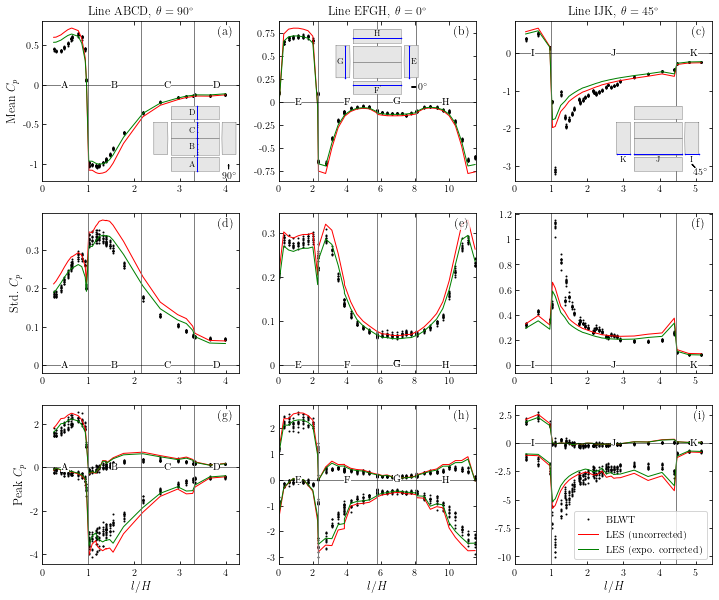

In [38]:
showLES_corr = True
showLES_uncorr = True
ms = 2
lw = 1.0
kwargs_plt_WT={'ls':'', 'marker':'.', 'color':'k', 'ms':ms, 'lw':0.5}
kwargs_plt_LES={'ls':'-', 'marker':'', 'color':'r', 'ms':5, 'lw':lw}
kwargs_plt_LEScorr={'ls':'-', 'marker':'', 'color':'g', 'ms':5, 'lw':lw}

fig, axs = plt.subplots(3, 3, figsize=[12,10.0],)

AoA = 90
ax = axs[0,0]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesABCD_WT.parentBldg = wt
    linesABCD_WT.plotCpStats(ax=ax, AoA=AoA, field='mean', label=label, showXLabel=False, 
                             kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesABCD_LES.parentBldg = LES_Cp
    linesABCD_LES.plotCpStats(ax=ax, AoA=AoA, field='mean', showXLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesABCD_LES.parentBldg = LES_Cp_corrected
    linesABCD_LES.plotCpStats(ax=ax, AoA=AoA, field='mean', showXLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesABCD_LES.length_Norm])
ax.set_title(f"Line ABCD, $\\theta={AoA}^\circ$")
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)

ax = axs[1,0]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesABCD_WT.parentBldg = wt
    linesABCD_WT.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, label=label, 
                             kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesABCD_LES.parentBldg = LES_Cp
    linesABCD_LES.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesABCD_LES.parentBldg = LES_Cp_corrected
    linesABCD_LES.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesABCD_LES.length_Norm])
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)

ax = axs[2,0]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesABCD_WT.parentBldg = wt
    linesABCD_WT.plotCpStats(ax=ax, AoA=AoA, field='peakMax', yLabel=wind.fullName('peak',abbreviate=True), label=label, 
                             kwargs_plt=kwargs_plt_WT)
    linesABCD_WT.plotCpStats(ax=ax, AoA=AoA, field='peakMin', showYLabel=False, label=label, showLineSegmentNames=False,
                             kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesABCD_LES.parentBldg = LES_Cp
    linesABCD_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMax', showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LES)
    linesABCD_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMin', showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesABCD_LES.parentBldg = LES_Cp_corrected
    linesABCD_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMax', showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LEScorr)
    linesABCD_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMin', showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesABCD_LES.length_Norm])
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)


AoA = 0
ax = axs[0,1]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesEFGH_WT.parentBldg = wt
    linesEFGH_WT.plotCpStats(ax=ax, AoA=AoA, field='mean', showXLabel=False, showYLabel=False, label=label, 
                             kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesEFGH_LES.parentBldg = LES_Cp
    linesEFGH_LES.plotCpStats(ax=ax, AoA=AoA, field='mean', showXLabel=False, showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesEFGH_LES.parentBldg = LES_Cp_corrected
    linesEFGH_LES.plotCpStats(ax=ax, AoA=AoA, field='mean', showXLabel=False, showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesEFGH_LES.length_Norm])
ax.set_title(f"Line EFGH, $\\theta={AoA}^\circ$")
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)

ax = axs[1,1]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesEFGH_WT.parentBldg = wt
    linesEFGH_WT.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, showYLabel=False, label=label, 
                             kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesEFGH_LES.parentBldg = LES_Cp
    linesEFGH_LES.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesEFGH_LES.parentBldg = LES_Cp_corrected
    linesEFGH_LES.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesEFGH_LES.length_Norm])
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)

ax = axs[2,1]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesEFGH_WT.parentBldg = wt
    linesEFGH_WT.plotCpStats(ax=ax, AoA=AoA, field='peakMax', label=label, showYLabel=False, 
                             kwargs_plt=kwargs_plt_WT)
    linesEFGH_WT.plotCpStats(ax=ax, AoA=AoA, field='peakMin', label=label, showYLabel=False, showLineSegmentNames=False,
                             kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesEFGH_LES.parentBldg = LES_Cp
    linesEFGH_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMax', showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LES)
    linesEFGH_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMin', showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesEFGH_LES.parentBldg = LES_Cp_corrected
    linesEFGH_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMax', showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LEScorr)
    linesEFGH_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMin', showYLabel=False, showLineSegmentNames=False,
                              kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesEFGH_LES.length_Norm])
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)


AoA = 45
ax = axs[0,2]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesIJK_WT.parentBldg = wt
    linesIJK_WT.plotCpStats(ax=ax, AoA=AoA, field='mean', showXLabel=False, showYLabel=False, label=label, 
                          kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesIJK_LES.parentBldg = LES_Cp
    linesIJK_LES.plotCpStats(ax=ax, AoA=AoA, field='mean', showXLabel=False, showYLabel=False, showLineSegmentNames=False,
                           kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesIJK_LES.parentBldg = LES_Cp_corrected
    linesIJK_LES.plotCpStats(ax=ax, AoA=AoA, field='mean', showXLabel=False, showYLabel=False, showLineSegmentNames=False,
                           kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesIJK_LES.length_Norm])
ax.set_title(f"Line IJK, $\\theta={AoA}^\circ$")
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)

ax = axs[1,2]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesIJK_WT.parentBldg = wt
    linesIJK_WT.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, showYLabel=False, label=label, 
                          kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesIJK_LES.parentBldg = LES_Cp
    linesIJK_LES.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, showYLabel=False, showLineSegmentNames=False,
                           kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesIJK_LES.parentBldg = LES_Cp_corrected
    linesIJK_LES.plotCpStats(ax=ax, AoA=AoA, field='std', showXLabel=False, showYLabel=False, showLineSegmentNames=False,
                           kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesIJK_LES.length_Norm])
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)

ax = axs[2,2]
for i, wt in enumerate(WT_cp_all.memberBldgs):
    label = "BLWT" if i==0 else ''
    linesIJK_WT.parentBldg = wt
    linesIJK_WT.plotCpStats(ax=ax, AoA=AoA, field='peakMax', showYLabel=False, label='', 
                          kwargs_plt=kwargs_plt_WT)
    linesIJK_WT.plotCpStats(ax=ax, AoA=AoA, field='peakMin', showYLabel=False, label=label, showLineSegmentNames=False,
                          kwargs_plt=kwargs_plt_WT)
if showLES_uncorr:
    linesIJK_LES.parentBldg = LES_Cp
    linesIJK_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMax', showYLabel=False, label='', showLineSegmentNames=False,
                           kwargs_plt=kwargs_plt_LES)
    linesIJK_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMin', showYLabel=False, label='LES (uncorrected)', showLineSegmentNames=False,
                           kwargs_plt=kwargs_plt_LES)
if showLES_corr:
    linesIJK_LES.parentBldg = LES_Cp_corrected
    linesIJK_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMax', showYLabel=False, label='', showLineSegmentNames=False,
                           kwargs_plt=kwargs_plt_LEScorr)
    linesIJK_LES.plotCpStats(ax=ax, AoA=AoA, field='peakMin', showYLabel=False, label='LES (expo. corrected)', showLineSegmentNames=False,
                           kwargs_plt=kwargs_plt_LEScorr)
ax.axhline(y=0.0, ls='-', color='k', lw=0.5)
ax.set_xlim([0, linesIJK_LES.length_Norm])
wind.formatAxis(ax=ax, gridMajor=False, gridMinor=False)

ax.legend(loc='lower right', )



# create an inset axes object in axs[1,2] with independent axes values
kwargs_line = {'txtDistFromLine':0.027,
               'kwargs_Edge':{'color':'b', 'lw':1.0, 'ls':'-', 'marker':'.', 'markersize':1},
               'kwargs_Name':{'ha':'center', 'va':'center', 'color':'k', 'fontsize':8, 'bbox':{'facecolor':'w', 'alpha':0.0, 'pad':0.15, 'edgecolor':'none'}}}
kwargs_taps={'kwargs_dots':{'color':'r', 'lw':0.5, 'ls':'None', 'marker':'', 'markersize':1},
            'kwargs_text':{'ha':'left', 'va':'top', 'color':'k', 'backgroundcolor':[1,1,1,0.0], 'fontsize':'small', 'rotation':45},}
kwargs_Fill={'facecolor':[0.9,0.9,0.9], 'edgecolor':'None', 'lw':0.5, 'ls':'-'}
kwargs_Edge = { 'color': [0.5,0.5,0.5],'lw': 0.5,'ls': '-' }


ax2 = axs[0,0].inset_axes([0.55, 0.04, 0.45, 0.45])
bldg.plotEdges(ax=ax2,showName=False, fill=True, kwargs_Edge=kwargs_Edge, kwargs_Fill=kwargs_Fill)
bldg.plotAoA_symbol(ax=ax2, AoA=90, location='lower right', drawDicorations=False, textOffsetFactor=4, size=0.8)
linesABCD_LES.plot(ax=ax2, kwargs_line=kwargs_line, kwargs_taps=kwargs_taps)
ax2.axis('equal')
ax2.axis('off')

ax2 = axs[0,1].inset_axes([0.275, 0.52, 0.45, 0.45])
bldg.plotEdges(ax=ax2,showName=False, fill=True, kwargs_Edge=kwargs_Edge, kwargs_Fill=kwargs_Fill)
bldg.plotAoA_symbol(ax=ax2, AoA=0, location='lower right', drawDicorations=False, textOffsetFactor=4, size=0.8)
linesEFGH_LES.plot(ax=ax2, kwargs_line=kwargs_line, kwargs_taps=kwargs_taps)
ax2.axis('equal')
ax2.axis('off')

ax2  = axs[0,2].inset_axes([0.5, 0.04, 0.45, 0.45])
bldg.plotEdges(ax=ax2,showName=False, fill=True, kwargs_Edge=kwargs_Edge, kwargs_Fill=kwargs_Fill)
bldg.plotAoA_symbol(ax=ax2, AoA=45, location='lower right', drawDicorations=False, textOffsetFactor=4, size=0.8)
linesIJK_WT.plot(ax=ax2, kwargs_line=kwargs_line, kwargs_taps=kwargs_taps)
ax2.axis('equal')
ax2.axis('off')


kwargs = {'xycoords':'axes fraction', 'ha':'right', 'va':'top', 'color':'k', 'fontsize':'large', 
          'bbox':{'facecolor':'w', 'alpha':0.8, 'pad':0.5, 'edgecolor':'none'}}
xy = (0.97, 0.97)
axs[0,0].annotate('(a)', xy=xy, **kwargs)
axs[0,1].annotate('(b)', xy=xy, **kwargs)
axs[0,2].annotate('(c)', xy=xy, **kwargs)
axs[1,0].annotate('(d)', xy=xy, **kwargs)
axs[1,1].annotate('(e)', xy=xy, **kwargs)
axs[1,2].annotate('(f)', xy=xy, **kwargs)
axs[2,0].annotate('(g)', xy=xy, **kwargs)
axs[2,1].annotate('(h)', xy=xy, **kwargs)
axs[2,2].annotate('(i)', xy=xy, **kwargs)


plt.show()
if saveFigs:
    fig.savefig(figDir+"CpStats_overline.svg",format='svg',dpi=300, bbox_inches='tight')

# Plots

No velocity time history found for ESDU-74 ($z_0=0.01 m$). Skipping velocity statistics calculation.
No velocity time history found for ESDU-85 ($z_0=0.01 m$). Skipping velocity statistics calculation.
Message from Profiles.plotProfile_basic2(): Future feature notice: a table of normalizers like H, Uref, etc. next to the legend.
          Location: D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\wind.py
          Function: plotProfile_basic2
          Line number: 5072


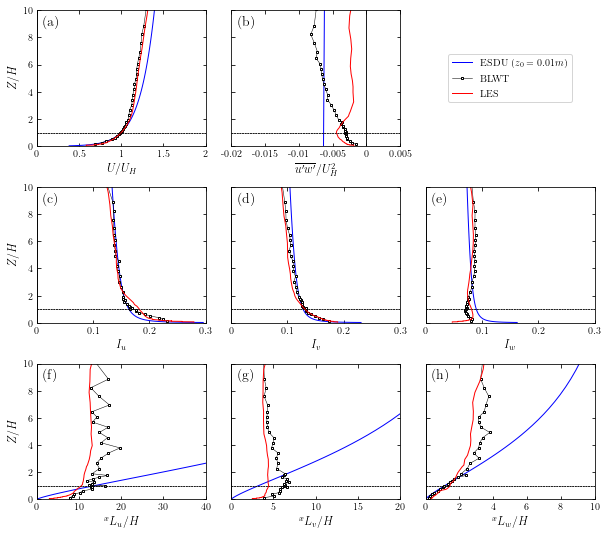

In [39]:
WT_cp.profile.name = 'BLWT'
LES_Cp.profile.name = 'LES'
es74 = esdu74_E2.toProfileObj()
es74.name = f'ESDU-74 ($z_0={es74.z0_Iu:.2g}m$)'
es74.SpectH.name = es74.name

es85 = esdu85_E2.toProfileObj()
es85.name = f'ESDU ($z_0={es85.z0_Iu:.2g}m$)'
es85.SpectH.name = es85.name

profs = wind.Profiles([es85, WT_cp.profile, LES_Cp.profile]) #, es74, es85])

fig, axs = profs.plotProfile_basic2(figsize=[10,9], hspace=0.3, wspace=0.15, sharey=True,
            yLimits=[0,10], showSubPlotLabels=True, #subPlotLabels={'U':'(a)', 'uw':'(b)', 'Iu':'(c)', 'Iv':'(d)', 'Iw':'(e)', 'xLu':'(f)', 'xLv':'(g)', 'xLw':'(h)'},
            xLimits_U=[0, 2], xLimits_uw=[-0.02, 0.005], 
            xLimits_Iu=[0,0.3], xLimits_Iv=[0,0.3], xLimits_Iw=[0,0.3], 
            xLimits_xLu=[0, 40], xLimits_xLv=[0,20], xLimits_xLw=[0,10], 
            kwargs_plt=[{'color': 'b', 'linewidth':1.0, 'linestyle': '-',      'marker': 'None', 'markersize':6, 'markerfacecolor':'w'},
                        {'color': 'k', 'linewidth':0.5, 'linestyle': '-',       'marker': 's', 'markersize':2, 'markerfacecolor':'w'},
                        {'color': 'r', 'linewidth':1.0, 'linestyle': '-',       'marker': 'None', 'markersize':3, 'markerfacecolor':'w'},
                        {'color': 'g', 'linewidth':1.0, 'linestyle': '--',       'marker': 'None', 'markersize':6, 'markerfacecolor':'w'},
                        {'color': 'k', 'linewidth':1.0, 'linestyle': '-.',      'marker': 'None', 'markersize':6, 'markerfacecolor':'w'},
                        ],
            lgnd_kwargs={'bbox_to_anchor': (0.5, 0.5), 'loc': 'center', 'ncol': 1},
            kwargs_ax={'gridMajor':False}
            )
# if saveFigs:
#     fig.savefig(figDir+"profile_basic2_simple.svg",format='svg',dpi=1200, bbox_inches='tight')
#     print(f"Figure saved to {figDir}profile_basic2.svg")


In [40]:
print(lesVel_E2.ReTau)

15.170800633151499


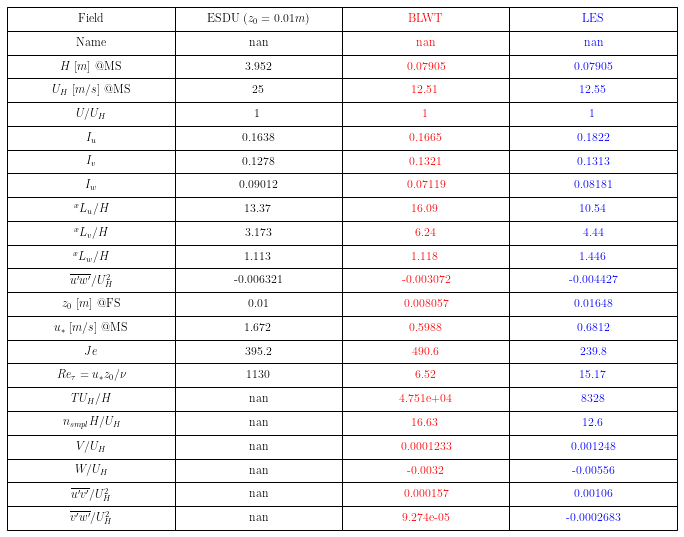

In [41]:
fig, _ = profs.plotParamsTable( colTxtColors=['k','r','b','g'], fontSz=12, 
                                params = 'all',
                                # params = wind.mathName(['H','Iu','Iv','Iw']),
                                )

# fig.savefig(figDir+"paramsTable_vel.svg",format='svg',dpi=1200, bbox_inches='tight')

No velocity time history found for vonKarman. Skipping velocity statistics calculation.
Figure saved: D:/tempData_depot/simData_CandC/wt_tngE2_final/main.infl.t5.r2.s2/__plots//spectra.svg


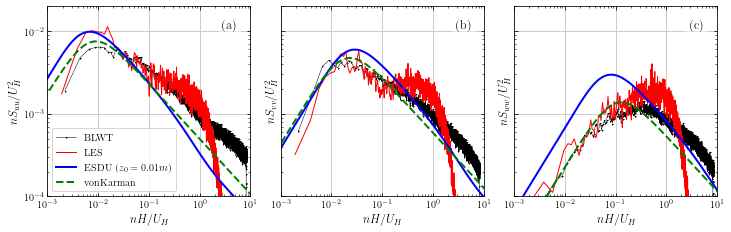

In [42]:
vonk = wind.profile(name='vonKarman', )
Sp = wtVel_E2.SpectH.copy()
n = np.logspace(-3, 3, 100)
Suu, Svv, Sww = wind.vonKarmanSpectra(n=n, U=Sp.U, Iu=Sp.Iu, Iv=Sp.Iv, Iw=Sp.Iw, xLu=Sp.xLu, xLv=Sp.xLv, xLw=Sp.xLw,)
vonk.SpectH = wind.spectra(name=vonk.name, Z=H, Suu=Suu, Svv=Svv, Sww=Sww, n=n, U=Sp.U, Iu=Sp.Iu, Iv=Sp.Iv, Iw=Sp.Iw, xLu=Sp.xLu, xLv=Sp.xLv, xLw=Sp.xLw,)

profss = wind.Profiles([WT_cp.profile, LES_Cp.profile, es85, vonk]) #, es74, es85])
LES_Cp.profile.SpectH.name = 'LES'
WT_cp.profile.SpectH.name = 'BLWT'

clb = 0
r = [1.0, clb, clb, 1.0]
b = [clb, clb, clb, 1.0]
kwargs_plt=[{'color': b, 'markerfacecolor':b, 'markeredgecolor':b, 'alpha':1, 'linewidth':0.5, 'linestyle': '-',    'marker': '+', 'markersize':1},
                            {'color': r, 'markerfacecolor':r, 'markeredgecolor':r, 'alpha':1, 'linewidth':1, 'linestyle': '-',    'marker': '', 'markersize':2},
                            {'color': 'b', 'linewidth':2, 'linestyle': '-',       'marker': 'None', 'markersize':6, 'markerfacecolor':'w'},
                            {'color': 'g', 'linewidth':2, 'linestyle': '--',      'marker': 'None', 'markersize':6, 'markerfacecolor':'w'},
                            {'color': 'k', 'linewidth':2, 'linestyle': '-.',      'marker': 'None', 'markersize':6, 'markerfacecolor':'w'},
                            ]

fig, _ = profss.plotSpectra(figsize=[12,3.5], normalize=True,
                        xLimits=[1e-3, 1e1], 
                        yLimits=[[1e-4,2e-2],[1e-4,2e-2],[1e-4,2e-2]], 
                        wspace=0.15, shareY=True, normU='U', normZ='Z',
                        subPlotLabel_xy=[0.9,0.9],
                        kwargs_plt=kwargs_plt,)
# fig.tight_layout()
# reduce the gap between subplots
# fig.subplots_adjust(wspace=0.37)

if saveFigs:
    fig.savefig(figDir+'spectra.svg', format='svg',dpi=600, bbox_inches='tight')
    print(f"Figure saved: {figDir}/spectra.svg")

0.6812341226173684
0.3639453215319163
1.6723857914750933


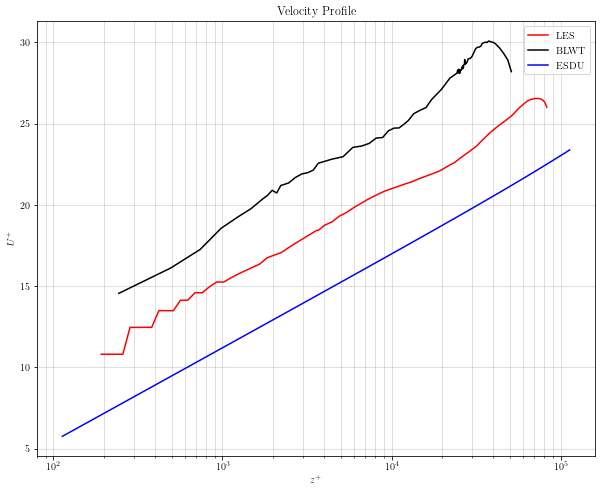

In [43]:
wtVel_E2.fluidDensity = 1.0
wtVel_E2.fluidKinematicViscosity = 1.48e-5
es85.fluidDensity = 1.0
es85.fluidKinematicViscosity = 1.48e-5 * (50*50)/25
print(lesVel_E2.shearVelocity)
print(wtVel_E2.shearVelocity)
print(es85.shearVelocity)
# print(lesVel_E2.fluidDensity)

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot()

ax.semilogx(lesVel_E2.Z_plus, lesVel_E2.U_plus, 'r', label='LES')
ax.semilogx(wtVel_E2.Z_plus, wtVel_E2.U_plus, 'k', label='BLWT')
ax.semilogx(es85.Z_plus, es85.U_plus, 'b', label='ESDU')
# ax.set_xlim([1, 1e4])
# ax.set_ylim([0, 25])
ax.set_xlabel('$z^+$')
ax.set_ylabel('$U^+$')
ax.legend()
ax.grid(True, which='both', axis='both', alpha=0.5)
ax.set_title('Velocity Profile')

plt.show()

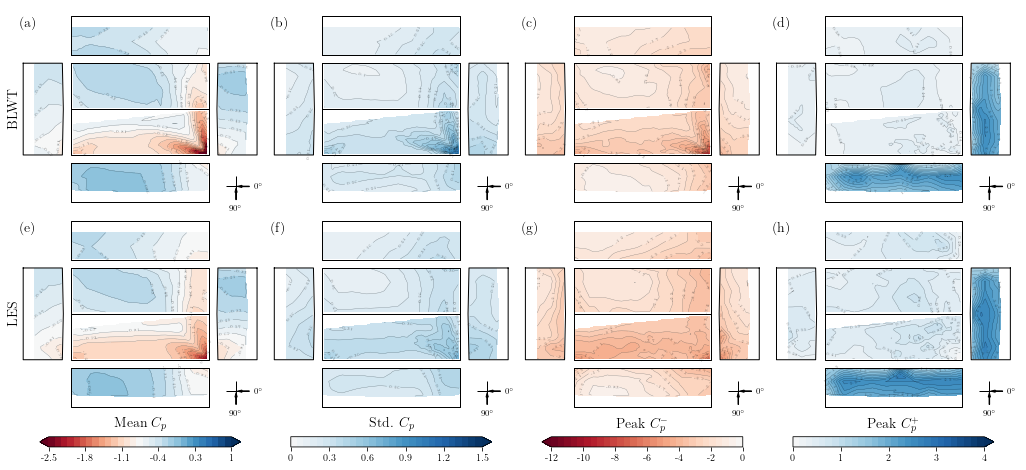

In [44]:
from matplotlib.ticker import FuncFormatter

figsize = [18,11.3] # [15,10]
fig, axs = plt.subplots(3,4,figsize=figsize)
ax_cbar1 = axs[2,0]
ax_cbar2 = axs[2,1]
ax_cbar3 = axs[2,2]
ax_cbar4 = axs[2,3]

# fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
fig.subplots_adjust(wspace=0.0, hspace=0.0)

subLbls = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)',
           '(m)', '(n)', '(o)', '(p)', '(q)', '(r)', '(s)', '(t)', '(u)', '(v)', '(w)', '(x)']

names = ['BLWT', 'LES']

for i, cp in enumerate([WT_cp, LES_Cp]):

    vals = np.linspace(-2.5, 1.0, 6)
    fld, fldrange, ticks = 'mean', [vals[0], vals[-1]], vals
    
    ax = axs[i,0]
    im = cp.plotTapCpStatContour(ax=ax, envelopeType='low',fieldName=fld,fldRange=fldrange,nLvl=30,title=wind.fullName(fld,abbreviate=True),)
    cp.plotEdges(ax=ax, showName=False)
    cp.plotAoA_definition(ax=ax, size=0.7, marginFactor=[1.0,0.5], location='lower right', AoAs=[0, 90], textOffsetFactor=3.0)
    ax.annotate(names[i], xy=(0.02, 0.5), xycoords='axes fraction', fontsize=14, ha='right', va='center', rotation=90,
                # bbox=dict(boxstyle="round", fc="w", ec="k", pad=0.2))
                bbox=dict(boxstyle="round", fc="w", ec="None", pad=0.1))
    ax.annotate(f"{subLbls[i*4]}", xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14, ha='left', va='top', rotation=0,
                bbox=dict(boxstyle="round", fc="w", ec="None", pad=0.1))
    ax.axis('equal')
    ax.axis('off')
    if i == 1:
        ax_cbar1.axis('on')
        cbar = fig.colorbar(im[0], cax=ax_cbar1, orientation='horizontal',aspect=20,shrink=0.5,pad=0.08)
        cbar.set_ticks(ticks)
        cbar.ax.set_xlabel(wind.fullName(fld,abbreviate=True), fontsize=14, rotation=0, labelpad=10)
        cbar.ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2g}'))
        cbar.ax.xaxis.set_label_position('top')
        pos = ax_cbar1.get_position()
        new_pos = [pos.x0+pos.width*0.1, pos.y0+pos.height*0.85, pos.width*0.8, pos.height*0.05]
        ax_cbar1.set_position(new_pos)


    vals = np.linspace(0, 1.5, 6)
    fld, fldrange, ticks = 'std', [vals[0], vals[-1]], vals
    ax = axs[i,1]
    im = cp.plotTapCpStatContour(ax=ax, envelopeType='high',fieldName=fld,fldRange=fldrange,nLvl=30,title=wind.fullName(fld,abbreviate=True), extend='max',
                                 cmap=wind.sub_cmap(cmap='RdBu', start=0.5, stop=1.0, n=30))
    cp.plotEdges(ax=ax, showName=False)
    cp.plotAoA_definition(ax=ax, size=0.7, marginFactor=[1.0,0.5], location='lower right', AoAs=[0, 90], textOffsetFactor=3.0)
    ax.annotate(f"{subLbls[i*4 + 1]}", xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14, ha='left', va='top', rotation=0,
                bbox=dict(boxstyle="round", fc="w", ec="None", pad=0.1))
    ax.axis('equal')
    ax.axis('off')
    if i == 1:
        ax_cbar2.axis('on')
        cbar = fig.colorbar(im[0], cax=ax_cbar2, orientation='horizontal',aspect=20,shrink=0.5,pad=0.08)
        cbar.set_ticks(ticks)
        cbar.ax.set_xlabel(wind.fullName(fld,abbreviate=True), fontsize=14, rotation=0, labelpad=10)
        cbar.ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2g}'))
        cbar.ax.xaxis.set_label_position('top')
        pos = ax_cbar2.get_position()
        new_pos = [pos.x0+pos.width*0.1, pos.y0+pos.height*0.85, pos.width*0.8, pos.height*0.05]
        ax_cbar2.set_position(new_pos)


    vals = np.linspace(-12.0, 0, 7)
    fld, fldrange, ticks = 'peakMin', [vals[0], vals[-1]], vals
    ax = axs[i,2]
    im = cp.plotTapCpStatContour(ax=ax, envelopeType='low',fieldName=fld,fldRange=fldrange,nLvl=30,title=wind.fullName(fld,abbreviate=True), extend='min',
                                 cmap=wind.sub_cmap(cmap='RdBu', stop=0.5, n=30))
    cp.plotEdges(ax=ax, showName=False)
    cp.plotAoA_definition(ax=ax, size=0.7, marginFactor=[1.0,0.5], location='lower right', AoAs=[0, 90], textOffsetFactor=3.0)
    ax.annotate(f"{subLbls[i*4 + 2]}", xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14, ha='left', va='top', rotation=0,
                bbox=dict(boxstyle="round", fc="w", ec="None", pad=0.1))
    ax.axis('equal')
    ax.axis('off')
    if i == 1:
        ax_cbar3.axis('on')
        cbar = fig.colorbar(im[0], cax=ax_cbar3, orientation='horizontal',aspect=20,shrink=0.7,pad=0.08)
        cbar.set_ticks(ticks)
        cbar.ax.set_xlabel(wind.fullName(fld,abbreviate=True), fontsize=14, rotation=0, labelpad=10)
        cbar.ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2g}'))
        cbar.ax.xaxis.set_label_position('top')
        pos = ax_cbar3.get_position()
        new_pos = [pos.x0+pos.width*0.1, pos.y0+pos.height*0.85, pos.width*0.8, pos.height*0.05]
        ax_cbar3.set_position(new_pos)


    vals = np.linspace(0, 4.0, 5)
    fld, fldrange, ticks = 'peakMax', [vals[0], vals[-1]], vals
    ax = axs[i,3]
    im = cp.plotTapCpStatContour(ax=ax, envelopeType='high',fieldName=fld,fldRange=fldrange,nLvl=30,title=wind.fullName(fld,abbreviate=True), extend='max',
                                 cmap=wind.sub_cmap(cmap='RdBu', start=0.5, stop=1.0, n=30))
    cp.plotEdges(ax=ax, showName=False)
    cp.plotAoA_definition(ax=ax, size=0.7, marginFactor=[1.0,0.5], location='lower right', AoAs=[0, 90], textOffsetFactor=3.0)
    ax.annotate(f"{subLbls[i*4 + 3]}", xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14, ha='left', va='top', rotation=0,
                bbox=dict(boxstyle="round", fc="w", ec="None", pad=0.1))
    ax.axis('equal')
    ax.axis('off')
    if i == 1:
        ax_cbar4.axis('on')
        cbar = fig.colorbar(im[0], cax=ax_cbar4, orientation='horizontal',aspect=20,shrink=0.7,pad=0.08)
        cbar.set_ticks(ticks)
        cbar.ax.set_xlabel(wind.fullName(fld,abbreviate=True), fontsize=14, rotation=0, labelpad=10)
        cbar.ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2g}'))
        cbar.ax.xaxis.set_label_position('top')
        pos = ax_cbar4.get_position()
        new_pos = [pos.x0+pos.width*0.1, pos.y0+pos.height*0.85, pos.width*0.8, pos.height*0.05]
        ax_cbar4.set_position(new_pos)

# if saveFigs:
#     fileName = figDir+f"CpContour.svg"
#     fig.savefig(fileName,format='svg',dpi=600, bbox_inches='tight')
#     print(f"Figure saved to {fileName}")
    

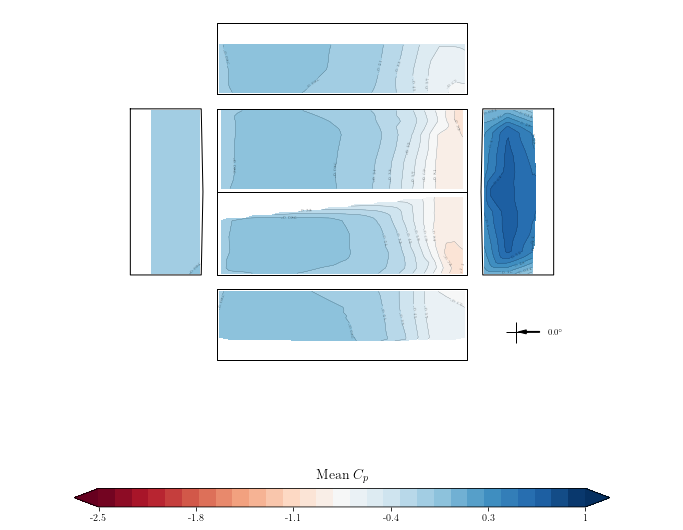

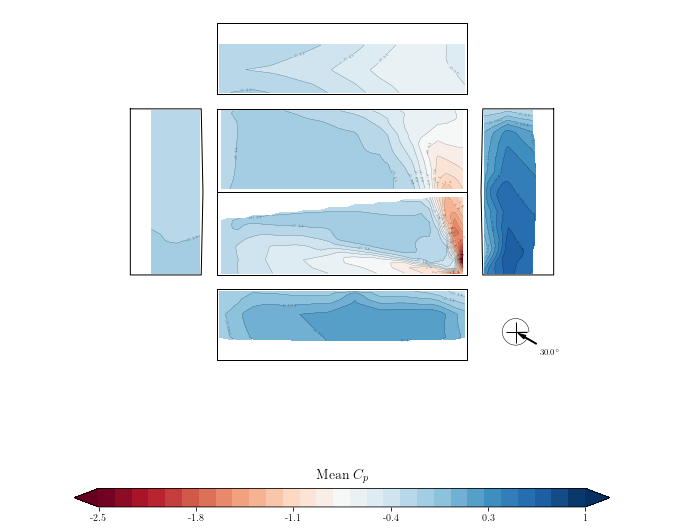

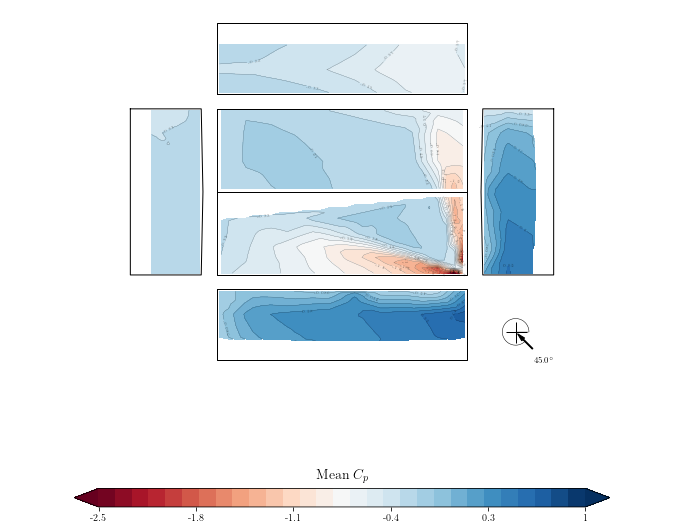

D:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:1263: UserWarning: No contour levels were found within the data range.
  cObj_l = ax.contour(X, Y, Z, levels=levels, **kwargs_contourEdge)


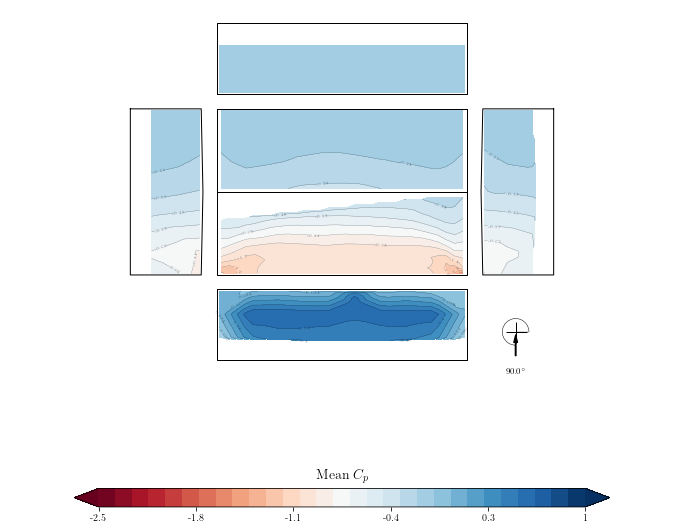

In [45]:
for aoaI in [0,3,4,8]:

    fig, axs = plt.subplots(2,1,figsize=[12,15])
    ax = axs[0]
    ax_cbar1 = axs[1]

    im = WT_cp.plotTapCpStatContour(ax=ax, dxnIdx=aoaI,fieldName='mean',fldRange=[-2.5, 1.0],nLvl=30,title=wind.fullName('mean',abbreviate=True),)
    WT_cp.plotEdges(ax=ax, showName=False)
    WT_cp.plotAoA_definition(ax=ax, size=0.7, marginFactor=[1.0,0.5], location='lower right', AoAs=[WT_cp.AoA[aoaI]], textOffsetFactor=3.0)
    ax.axis('equal')
    ax.axis('off')

    ax_cbar1.axis('on')
    cbar = fig.colorbar(im[0], cax=ax_cbar1, orientation='horizontal',aspect=20,shrink=0.5,pad=0.08)
    cbar.set_ticks(np.linspace(-2.5, 1.0, 6))
    cbar.ax.set_xlabel(wind.fullName('mean',abbreviate=True), fontsize=14, rotation=0, labelpad=10)
    cbar.ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2g}'))
    cbar.ax.xaxis.set_label_position('top')
    pos = ax_cbar1.get_position()
    new_pos = [pos.x0+pos.width*0.1, pos.y0+pos.height*0.85, pos.width*0.8, pos.height*0.05]
    ax_cbar1.set_position(new_pos)

    plt.show()

In [46]:
bldgLst = [LES_Cp,]
bldgLst.extend(WT_cp_all.memberBldgs)
print(len(bldgLst))

cp_comp = wind.BldgCps(bldgLst) #[WT_cp, LES_Cp, LES_Cp_corrected])

# print(type(WT_cp_all.memberBldgs))

11
Number of member bldgs: 11


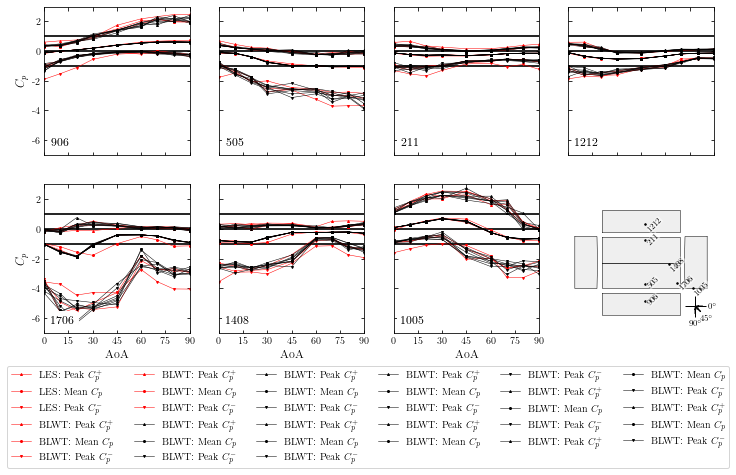

In [47]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# tapsToPlot=np.sort([405, 1806, 1709, 1006, 406, 1807, 1915, 1611, 1903, 1611])
tapsToPlot=[906, 505, 211, 1212, 1706, 1408, 1005]

figs, all_axes = cp_comp.plotTapCpStatsPerAoA(tapsToPlot=tapsToPlot, nCols=4, xlim=[-5,95], xticks=[0, 15, 30, 45, 60, 75, 90],
                                          nRows=2, figsize=[12,6], fldRange=[-7,3.0], nLgndCols=6, 
                                          # nRows=3, figsize=[12,9], fldRange=[-12,3.0], nLgndCols=3, 
                                          fields=['peakMax','mean','peakMin'], mrkrs=['^','o','v'], 
                                          # cols=['k','r','g'], 
                                          cols=['r','r','r','k','k','k','k','k','k','k','k','k','k','k','k','k','k'], 
                                          ls=['-','-','-','','','','','','','','','','','','','',''],
                                          # mrkrs=['']
                                          legend_bbox_to_anchor=(0.5, 0.06),
                                          pageNo_xy=(0.5, 0.05), showPageNo=False, kwargs_axFrmt={'gridMajor':False, 'gridMinor':False},
                                          )

fig = figs[0]
zoom = False

divider = make_axes_locatable(all_axes[0][-1,-1])
ax = divider.append_axes("bottom", size="1800%", pad=0.0,)

bldg.plotEdges(ax=ax, showName=False, fill=True, kwargs_Edge = { 'color': 'k','lw': 0.5,'ls': '-' })
bldg.plotTaps(ax=ax, tapsToPlot=tapsToPlot, showTapNo=True, 
              textOffset_tapNo=[0.002,0.03], 
              # textOffset_tapNo=[-0.001,0.002],
              kwargs_text= { 'ha': 'left','va': 'top','color': 'k','backgroundcolor': [1, 1, 1, 0.5],'fontsize': 'small','rotation': 45,
                            'bbox': dict(boxstyle="round", fc=[1, 1, 1, 0.5], ec="None", pad=0.0),})
if not zoom:
  bldg.plotAoA_definition(ax=ax, size=0.7, marginFactor=[1.0,0.5], location='lower right', AoAs=[0, 45, 90], textOffsetFactor=4.0)
ax.axis('equal')
_ = ax.axis('off')

if zoom:
  ax.set_xlim([0.1,0.15])
  ax.set_ylim([-0.1,-0.04])
  ax = make_axes_locatable(all_axes[0][-1,-2]).append_axes("bottom", size="1800%", pad=0.0,)
  bldg.plotEdges(ax=ax, showName=False, fill=True, kwargs_Edge = { 'color': 'k','lw': 0.5,'ls': '-' })
  bldg.plotAoA_definition(ax=ax, size=0.7, marginFactor=[1.0,0.5], location='lower right', AoAs=[0, 45, 90], textOffsetFactor=4.0)
  xlim, ylim = ax.get_xlim(), ax.get_ylim()
  ax.axis('equal')
  box_x = [xlim[0], xlim[0], xlim[1], xlim[1], xlim[0]]
  box_y = [ylim[0], ylim[1], ylim[1], ylim[0], ylim[0]]
  ax.plot(box_x, box_y, 'r--', linewidth=0.8)
  ax.axis('off')

plt.show()

# if saveFigs:
#     # fileName = figDir+f"CpStatsPerAoA_bigErrorTaps.svg"
#     fileName = figDir+f"CpStatsPerAoA_selectTaps.svg"
#     fig.savefig(fileName,format='svg',dpi=600, bbox_inches='tight')
#     print(f"Figure saved to {fileName}")

In [48]:
print(WT_cp.CpStats.keys())

dict_keys(['mean', 'std', 'peakMin', 'peakMax', 'skewness', 'kurtosis'])


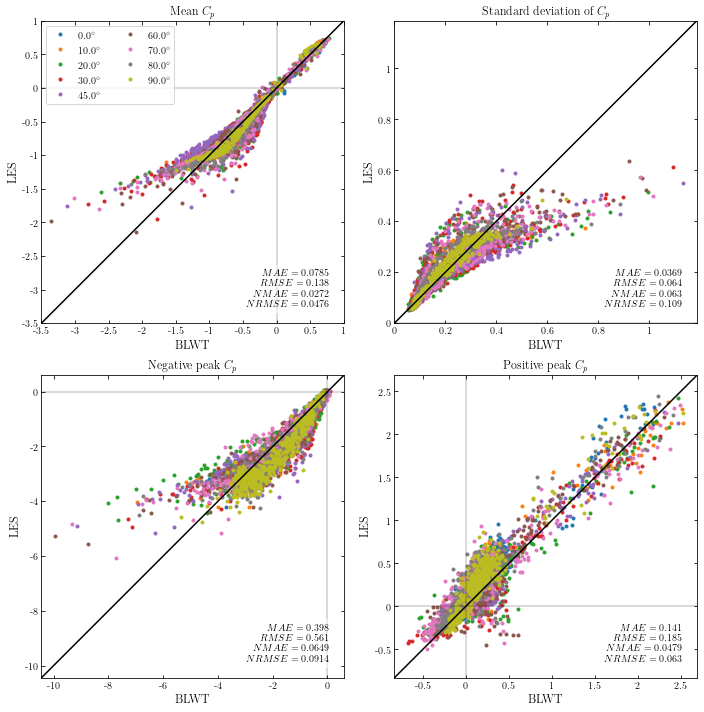

In [61]:

fig, _ = validator_2.plotError_CpStats(modelLabel='LES', targetLabel='BLWT', percentLinesAt=[], figsize_per_ax=[5,5], 
                                     showErrTxt=True, fields=['mean','std','peakMin','peakMax'], nPltCols=2,
                                    xyLims={'mean':[-3.5, 1], 'skewness': [-5, 3], 'kurtosis': [-5, 30]}, cols=wind.def_cols, showLegend=True,
                                    kwargs_legend={'loc': 'upper left', 'ncol': 2},
                                    )

# fig.savefig(figDir+'CpStatsErrorNew_small.svg', bbox_inches='tight', dpi=300)
# print(f"Figure saved: {figDir}CpStatsErrorNew_small.svg")

# # _ = validator.plotError_CpStats(xyLims={'skewness': [-5, 3], 'kurtosis': [-0.5, 30]})


In [ ]:

fig, _ = validator_2.plotError_CpStats_perAoA(targetLabel='BLWT', modelLabel='LES', AoA_list=WT_cp.AoA, figsize_per_ax=[2.5,2.5],
                                              errorTypePerField = { 'mean': 'RMSE','std': 'RMSE','peakMax': 'RMSE','peakMin': 'RMSE', 'skewness': 'RMSE', 'kurtosis': 'RMSE' },
                                              kwargs_mainPlot = { 'color': 'k','marker': '.','linestyle': '', 'ms': 2 }, #abbreviateFldNames=False,
                                              kwargs_frmtAxis={'gridMajor':False, 'gridMinor':False},
                                              kwargs_AoA_label={'rotation': 90,'ha': 'center','va': 'center', 'fontsize': 12}
                                              )
fig.savefig(figDir+'CpStatsError_perAoA_p1.svg', bbox_inches='tight', dpi=300)

# fig, _ = validator_2.plotError_CpStats_perAoA(targetLabel='BLWT', modelLabel='LES', AoA_list=WT_cp.AoA[5:], figsize_per_ax=[3,3],
#                                               errorTypePerField = { 'mean': 'RMSE','std': 'RMSE','peakMax': 'RMSE','peakMin': 'RMSE', 'skewness': 'RMSE', 'kurtosis': 'RMSE' })
# fig.savefig(figDir+'CpStatsError_perAoA_p2.svg', bbox_inches='tight', dpi=300)


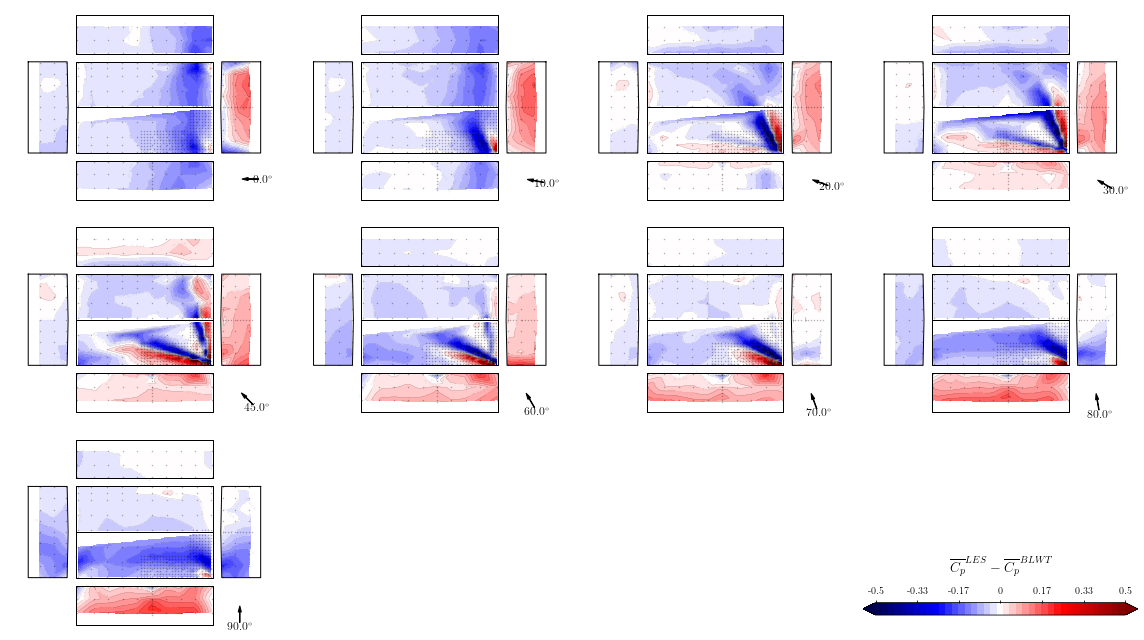

In [50]:


# # fld, fldRange = 'std', [-0.3, 0.3]
# fld, fldRange = 'mean', [-1.2, 1.2]
fld, fldRange = 'mean', [-0.5, 0.5]

fig, _ = validator.plotError_contour_CpStats(fieldName=fld, nLvl=40, figsize_per_ax=[4,3], AoAs=LES_Cp.AoA, #[0,20,45,80],
                                             nCols=4, colBarOrientation='horizontal', tLbl='BLWT', mLbl='LES', normalizedError=False,
                                            showValuesOnContour=True, cmap='seismic',
                                            fldRange=fldRange,
                                            )

fig.savefig(figDir+'CpStatsError_contour_'+fld+'_new.svg', bbox_inches='tight')


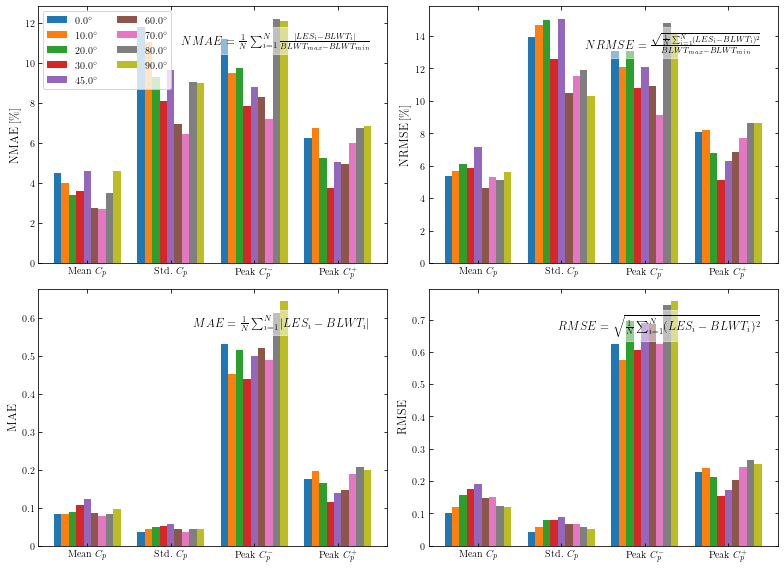

In [51]:
fig, _ = validator.plotError_barChart_CpStats(fields=['mean','std','peakMin','peakMax'], lumpAllAoAs=False, errorType=['NMAE','NRMSE','MAE','RMSE',], kwargs_legend={'loc':'upper left', 'ncol':2},
                                         cols=wind.def_cols, 
                                        figsize_per_ax=[5.5,4], nPltCols=2, #yLims={'NMAE':[0, 25], 'NRMSE':[0, 30], },
                                        kwargs_annotation={'xy':(0.95, 0.9), 'xycoords':'axes fraction', 'ha':'right', 'va':'top', 'backgroundcolor':[1,1,1,0.5], 'fontsize':12},
                                   )

fig.savefig(figDir+'CpStatsError_barChart_small.svg', bbox_inches='tight')

### $C_p$ Plots

In [52]:
print(WT_cp.T_star)

[4755.11824034 4751.19942609 4735.54844832 4728.70939289 4724.11009452
 4730.42498889 4724.15145571 4718.00896912 4720.47658485]


Number of member bldgs: 2
TO DO: avoid displaying 'nan'. Instead display '-'


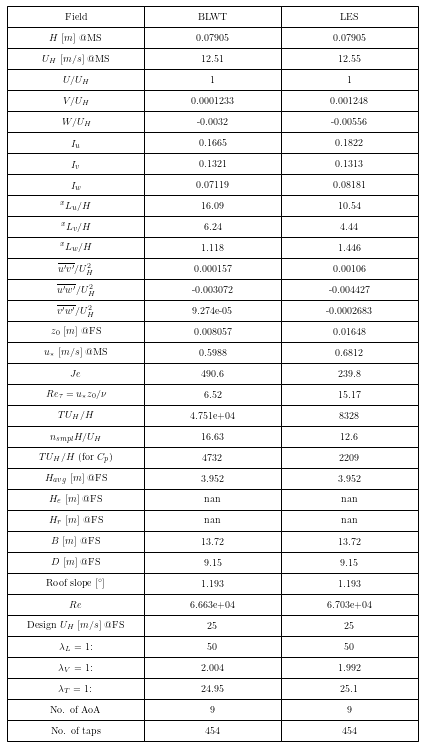

In [53]:
WT_cp.name = 'BLWT'
cps = wind.BldgCps([WT_cp, LES_Cp])

fig, _ = cps.plotParamsTable()

if saveFigs:
    fig.savefig(figDir+"paramsTable.svg",format='svg',dpi=1200, bbox_inches='tight')


#### Local pressure

In [54]:
# LES_Cp.plotTapCpStatsPerAoA(fldRange=[-8,2.3],#xticks=np.round(LES_Cp.AoA,0),
#                             pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])
# wtCp_tngE2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(wtCp_tngE2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])

# lesCp_E2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(lesCp_E2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])
# wtCp_tngE2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(wtCp_tngE2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])

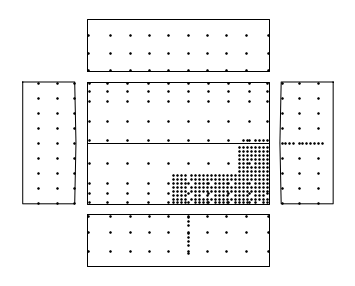

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
bldg.plotTaps(ax=ax)
bldg.plotEdges(ax=ax, showName=False)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

if saveFigs:
    fig.savefig(figDir+'tapLayout.svg', bbox_inches='tight')

#### Area averaged load

Computing C&C Load factor for BLWT ...
full_scale_duration = 748.0971482595144
z0 = 0.000161m (@MS), 0.00806m (@FS)

Calculating the lumped reference velocity conversion factors for C&C wind loads.
		From 		---> 	 To	===>	Factor
Type		simulated 	---> 	 ASCE
z0		0.00806 		---> 	 0.03	===>	1.17
Z		3.95 		---> 	 10	===>	0.756
gust_dur	748.1 		---> 	 3	===>	0.478
			COMBINED FACTOR			0.4217

C&C factor for case BLWT = 0.4217191185138574
Computing C&C Load factor for LES ...
full_scale_duration = 349.1829885315584
z0 = 0.00033m (@MS), 0.0165m (@FS)

Calculating the lumped reference velocity conversion factors for C&C wind loads.
		From 		---> 	 To	===>	Factor
Type		simulated 	---> 	 ASCE
z0		0.0165 		---> 	 0.03	===>	1.08
Z		3.95 		---> 	 10	===>	0.731
gust_dur	349.18 		---> 	 3	===>	0.513
			COMBINED FACTOR			0.4054

C&C factor for case LES = 0.40535404099407163


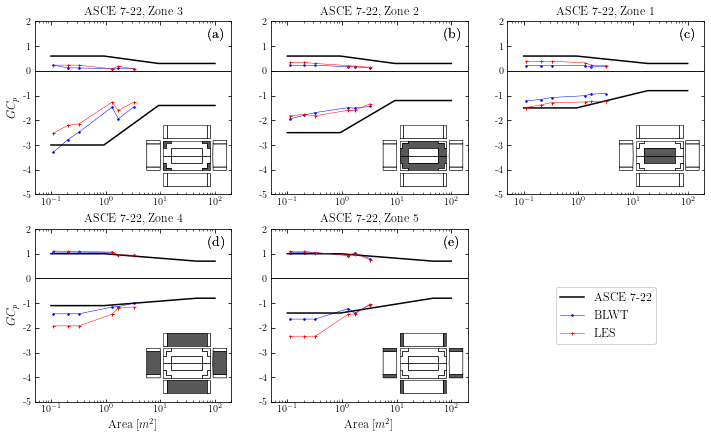

In [56]:
fig = plt.figure(figsize=[12,7])
plt.tight_layout()

NumZones = bldg.NumZones
nCols = min(3, NumZones)
nRows = int(np.ceil(NumZones/nCols))
axs = fig.subplots(nRows, nCols, sharex=False, sharey=False)

for I, zKey in enumerate(bldg.zoneDictKeys):
    i, j = np.unravel_index(I, axs.shape)
    ax = axs[i,j]
    ax.set_title(zKey)
    if i == axs.shape[0]-1:
        ax.set_xlabel(r'Area [$m^2$]')
    if j == 0:
        ax.set_ylabel(r"$GC_p$")
    ax.set_xlim([0.05,200])
    ax.set_ylim([-5,2])

    wind.formatAxis(ax, gridMajor=False, gridMinor=False)

directionalityFactor = 1.0 #0.85
cols = ['b','r','b','g','m','c']
mrkrs = ['.','+','^','v','<','>']
ms = [3,3,3,3,3,3]
names = ['BLWT', 'LES']
for i, cp in enumerate([WT_cp, LES_Cp]):
    if i == 0:
        overlayThese=[
                # windCodes.NBCC2020_CpCg(Figure='4.1.7.6.-C', subfig='a'),
                windCodes.ASCE7_22_GCp(Figure='30.3-2C', subfig='a', outAs='ASCE'),
                ]
        overlayFactors=[
            # 1.0/(directionalityFactor * (windCodes.getDurstFactor(3.0))**2),
            1.0,
            ]
        kwargs_overlay=(
            {'color':'k',}, 
            # {'color':'k', 'linestyle':'--'},
            )
    else:
        overlayThese=None
        overlayFactors=None
        kwargs_overlay=({},)

    _ = cp.plotCandC_load(fig=fig, axs=axs, 
                            # figSize=[12.5,12.5], 
                            sharex=False, sharey=False,
                            plotExtremesPerNominalArea=True, areaFactor=areaFactor_toFSm2,
                            # xLimits=[0.1,100], yLimits=[-5,1],
                            debugMode=True,
                            CandCLoadFormat='ASCE',
                            yLabel=r"$GC_p$",
                            label_min=names[i], label_max=None,
                            kwargs_min={'color':cols[i], 'marker':mrkrs[i], 'ms':3, 'ls':'-', 'lw': 0.5},
                            kwargs_max={'color':cols[i], 'marker':mrkrs[i], 'ms':3, 'ls':'-', 'lw': 0.5},
                            overlayThese=overlayThese,
                            overlayFactors=overlayFactors,
                            kwargs_overlay=kwargs_overlay,
                            legend_ax_idx=5,
                            kwargs_legend={'loc':'center', 'fontsize':12},
                            subplotLabels=['(a)','(b)','(c)','(d)','(e)',''], subplotLabels_xy=[0.88,0.9],
                            kwargs_ax={'gridMinor':True},
                            insetBounds=[0.55,0.01,0.445,0.43], insetAxAlpha=0.2,
                            )


plt.show()

# if saveFigs:
#     fig.savefig(figDir+"CandC_small.svg",format='svg',dpi=1200, bbox_inches='tight')
#     print(f"Saved figure: {figDir}CandC_Fig_E_iso.svg")


# Validate the aerodynamics with line plots (to be implemented)

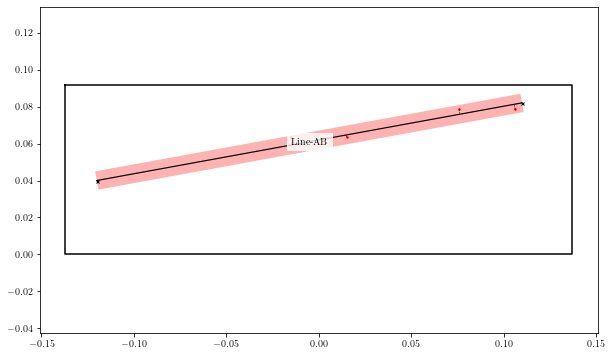

In [57]:
fc = faces_ASCE[0].copy()
# fc.basisVectors_plt = [[1, 0], [0, 1]]
start_xy=[-0.082,0.11]
end_xy=[-0.04,-0.12]
lineAB = windCAD.samplingLine(name='Line-AB',parentFace=fc, start_xy=start_xy, end_xy=end_xy, fringeDistance=0.005,)

# print(fc.vertices)
# print(fc.verticesPlt)

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot()
# ax.plot(fc.vertices[:,0], fc.vertices[:,1], 'k-')
ax.plot(fc.verticesPlt[:,0], fc.verticesPlt[:,1], 'k-')

# ax.plot(lineAB.xy[:,0], lineAB.xy[:,1], 'r-')
lineAB.plotLine(ax=ax)
lineAB.plotFringeZone(ax=ax)
lineAB.plotTaps(ax=ax)

ax.axis('equal')
plt.show()

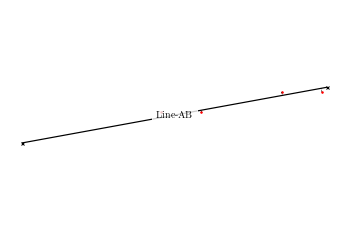

In [58]:
lineAB.plot()


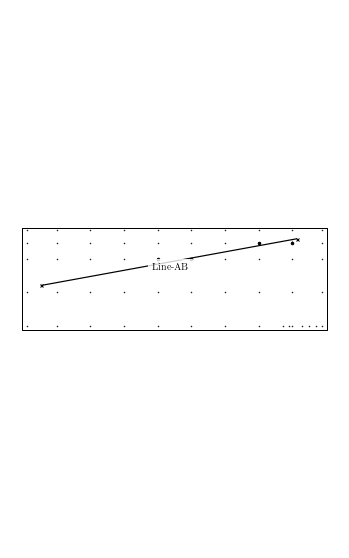

In [59]:
fig = plt.figure(figsize=[6,10])
ax = fig.add_subplot()

# fc = windCAD.face()

fc.plotEdges(ax=ax, showName=False)
fc.plotTaps(ax=ax, kwargs_dots={'color':'k', 'marker':'.', 'ms':1, 'ls':'', 'lw': 0.5})
lineAB.plotLine(ax=ax, arrowHeadSize=(0.003,0.009), arrowSize=0.02, arrowPosition='middle', showName=True, txtDistFromLine=0.005,
                kwargs_Arrow = { 'head_width': 0.004,'head_length': 0.012,'fc': 'k','ec': 'k','ls': '-','lw': 0.0 })
# lineAB.plotFringeZone(ax=ax)
lineAB.plotTaps(ax=ax, kwargs_dots={'color':'k', 'marker':'.', 'ms':5, 'ls':'', 'lw': 0.5})
ax.axis('equal')
ax.axis('off')

plt.show()
fig.savefig(figDir+"samplingLine.svg",format='svg',dpi=1200, bbox_inches='tight')


# Manual plots

C:\Users\Tsinu\AppData\Local\Temp\ipykernel_155052\2997955584.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$p_0$', '$p_1$', '$p_2$', '...', '$p_N$'])


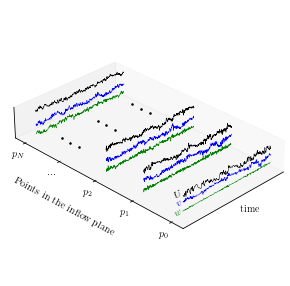

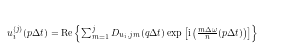

In [60]:
from mpl_toolkits.mplot3d import Axes3D

# open a 3D plot figure
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(projection='3d')

# add a bunch of 2D plots with different fixed z values
i = 2000
dv = 0.0
dw = -10.0
lw = 0.5
x = lesVel_E2.t[:i]

y1 = lesVel_E2.UofT[8,:i]
y2 = lesVel_E2.UofT[10,:i]
y3 = lesVel_E2.UofT[12,:i]
y4 = lesVel_E2.UofT[14,:i]
y5 = lesVel_E2.UofT[16,:i]

# plot the 2D plots
I, zs = 2, 0.0
ax.plot(x, lesVel_E2.UofT[I,:i], zs=zs, zdir='y', color='k', lw = lw, label='$U(t)$')
ax.plot(x, lesVel_E2.VofT[I,:i]+dv, zs=zs, zdir='y', color='b', lw = lw, label='$v(t)$')
ax.plot(x, lesVel_E2.WofT[I,:i]+dw, zs=zs, zdir='y', color='g', lw = lw, label='$w(t)$')

I, zs = 20, 0.1
ax.plot(x, lesVel_E2.UofT[I,:i], zs=zs, zdir='y', color='k', lw = lw)
ax.plot(x, lesVel_E2.VofT[I,:i]+dv, zs=zs, zdir='y', color='b', lw = lw)
ax.plot(x, lesVel_E2.WofT[I,:i]+dw, zs=zs, zdir='y', color='g', lw = lw)

I, zs = 30, 0.2
ax.plot(x, lesVel_E2.UofT[I,:i], zs=zs, zdir='y', color='k', lw = lw)
ax.plot(x, lesVel_E2.VofT[I,:i]+dv, zs=zs, zdir='y', color='b', lw = lw)
ax.plot(x, lesVel_E2.WofT[I,:i]+dw, zs=zs, zdir='y', color='g', lw = lw)

# plot dots between zs = 0.25 and zs = 0.45
ax.plot([0.275, 0.3, 0.325], [0,0,0], zs=0.0, zdir='x', color='k', lw = 1, ls='None', marker='.', ms=3)
ax.plot([0.275, 0.3, 0.325], [0,0,0], zs=0.4, zdir='x', color='k', lw = 1, ls='None', marker='.', ms=3)
ax.plot([0.275, 0.3, 0.325], [0,0,0], zs=0.8, zdir='x', color='k', lw = 1, ls='None', marker='.', ms=3)


I, zs = 48, 0.4
ax.plot(x, lesVel_E2.UofT[I,:i], zs=zs, zdir='y', color='k', lw = lw)
ax.plot(x, lesVel_E2.VofT[I,:i]+dv, zs=zs, zdir='y', color='b', lw = lw)
ax.plot(x, lesVel_E2.WofT[I,:i]+dw, zs=zs, zdir='y', color='g', lw = lw)


ax.text(0, 0.0, 8, r'$U$', zdir='x', color='k', #fontsize=10,
         verticalalignment='center', 
        horizontalalignment='right', bbox=dict(boxstyle="round", fc="None", ec="None", pad=0.2))
ax.text(0, 0.0, -2, r'$v$', zdir='x', color='b',
        fontsize=10, verticalalignment='center', 
        horizontalalignment='right', bbox=dict(boxstyle="round", fc="None", ec="None", pad=0.2))
ax.text(0, 0.0, -12, r'$w$', zdir='x', color='g',
        fontsize=10, verticalalignment='center', 
        horizontalalignment='right', bbox=dict(boxstyle="round", fc="None", ec="None", pad=0.2))


# ax.legend(bbox_to_anchor=(0.8, 0.8), loc='center', ncol=1)
ax.set_xlim(-0.1, max(x))
# ax.set_xlim(0, 1)
# ax.set_zlim(-0.1, 0.1)
ax.set_xlabel('time', labelpad=-10)
ax.set_ylabel('Points in the inflow plane', labelpad=20)
# ax.set_zlabel('z')

ax.set_zticklabels([])
ax.set_yticklabels(['$p_0$', '$p_1$', '$p_2$', '...', '$p_N$'])
ax.set_xticklabels([])
ax.set_zticks([])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
ax.set_xticks([])

ax.view_init(elev=30, azim=-135)

ax.set_box_aspect((0.6, 1, 0.15))

ax.grid(False)

# ax.auto_scale_xyz([-0.1, 0.1], [0, 1], [-0.1, 0.1])


plt.show()

# fig.savefig(figDir+'Inflow_schematic.svg', bbox_inches='tight', dpi=300)

# a separate simple figure for the equation
fig = plt.figure(figsize=[5,0.5])
ax = fig.add_subplot()

eqn = r'$u_i^{(j)}(p\Delta t) = \mathrm{Re} \left\{ \sum_{m=1}^{j} D_{u_i,jm}(q \Delta t) \exp \left[ \mathrm{i} \left( \frac{m \Delta \omega}{n} (p \Delta t) \right) \right] \right\} $'

ax.text(0, 0, eqn, ha='left', va='center', )

ax.axis('off')
plt.show()

# fig.savefig(figDir+'Inflow_schematic_eqn.svg', bbox_inches='tight', dpi=300)